# COMP578 Data Mining Spring 2017
## Final Project - Apurva Bharaswsdkar

The Neuroscience and Cognitive Science research community commonly uses rats to gain insights into processes occurring in the brain. One area of research is concerned with rats running in mazes (for example, see [an excellent Web site on rat behavior](http://ratbehavior.org/)). Evidently, rats are good learners in this domain (e.g., [1]). In one type of a maze, a rat is allowed to explore the maze with food placed in certain locations. In subsequent runs, the rat improves its ability to locate the food faster.

Some researchers hypothesize that the rat builds a topology of the maze in its brain (a cognitive map) through [place cells](https://en.wikipedia.org/wiki/Place_cell) in hippocampus ([2]) that are activated by cues from the environment. A similar associative mechanism allows a rat to remember the place where the food was found ([3]). The rat recalls the food locations and uses them as guiding goals for its treks in the maze. The recent experiments tend to suggest that a rat exposed to extinction (food is removed from the goal location) does not degrade the old memory, but instead it stores a competing negating fact. Therefore, a goal location can be re-established instantly if food is found in the same place again.

Rats evidently use topological maps of the maze to construct best possible paths to places with food. The cortex is the place where such temporary associations are made. One theory is that the entorhinal cortex is a link between the episodic hippocampus and more permanent storage in the cortex ([4]). Motivation plays an important role in rat’s behavior (e.g., hunger; in water mazes, rats need to find a hidden platform that will allows them to stop swimming). Without motivation the rat will not perform well, because there is no goal that drives its behavior ([3]).

A device called Neurosolver [5] was devised on these bologically-inspired ideas. The core search mechanism of the Neurosolver implements a cell place-based model similar to the one that emerges from the experiments with rats. The Neurosolver consists of individual nodes that can correspond to place cells that are joined is sequences in response to stimuli. The Neurosolver has been used to simulate some of the rat behavior in a maze simulator [6].

<img src="ciNeuroBotInMaze.jpg" width="600" height="400" style="float:left;padding:20px;"  alt="ciNeuroBot in a maze" title="ciNeuroBot in a maze"/>
<img src="ciNeuroBot.jpg" width="300" height="200" style="float:left;padding:20px;" alt="ciNeuroBot" title="ciNeuroBot"/>

<br style="clear:both"/>

Recently, a physical robot called ciNeuroBot has been constructed to explore the Neurosolver capabilities in a physical maze. While in the earlier work the availability of maze mappings was assumed, one of the objectives of the work on the ciNeuroBot is attaining by the robot the ability to construct topological maps automatically. The first step in that direction is the capability to identify environmental cues.

In this project, you are assigned a task of identifying cues by associating sensory signals with corresponding classifying place cells. 

1. Hodges, H. (1996). Maze procedures: the radial-arm and water maze compared, Cognitive Brain Research 3 (1996) 167 – 181, Elsevier North-Holland, New York, NY.
1. Fenton, A. A. and Muller, R.U. (1998). Place cell discharge is extremely variable during individual passesof the rat through the firing field, Proc. Natl. Acad. Sci. USA, Vol. 95, pp. 3182–3187.
1. Poucet, B. and Save, E. (2005). Attractors in Memory, Science, 308: 799--800, AAAS Press.
1. Bieszczad, A. and Pagurek, B. (1998). Neurosolver: Neuromorphic General Problem Solver, Information Sciences: An International Journal 105: 239--277, Elsevier North- Holland, New York, NY.
1. Fyhn, M., Molden, S. and Witter, M. P. (2004). Spatial Representation in the Entorhinal Cortex Marianne, Science, 305: 1258--1264, AAAS Press.
1. Bieszczad, A. and Bieszczad, K., (2006) Running Rats with Neurosolver-based Brains in Mazes, International Conference on Artificial Intelligence and Soft Computing, Zakopane, Poland, June 23-26, 2006.



### Task 1
##### 10 points

The environmental cues are perceived by a single-plane LIDAR that returns 360 measurements of distances from surrounding obstacles; in mazes, the obstacles are the walls.

In this task, you will use ciNeuroBot simulator to collect data for training.

The following is a sample collection for one cue: x-section. You should define more cues such as: `right turn`, `left turn`, `t-section in the front`, `t-section on the right`, `t-section on the left`, `hallway`, `no exit`, and possibly others. The guiding principle is the ability to localize the robot in the maze using a single cue at a time.

You can modify the robot position in the config file for the robot by setting `START_POS` to another pair of coordinates. You can click anywhere in the simulator to get the coordinates displayed below the maze. 
> Set `number_of_points` to some large value and `file` to `None` (or comment out that line) if you want to just see what's going on without capturing any data.

In [118]:
# %load ../standard_import.txt
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import sklearn
import sklearn.linear_model
import sklearn.discriminant_analysis
import sklearn.preprocessing
import sklearn.neighbors
import sklearn.metrics
import sklearn.model_selection
import sklearn.decomposition
import sklearn.cross_decomposition
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import sklearn.cluster
import scipy.cluster
from sklearn import metrics
from random import randrange
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.signal
from sklearn.cluster import AgglomerativeClustering
import random
pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

In [123]:
# %load simulator/config/maze_xs_bot.json
[
    {
      "AI": "simulator.code.simple_ai",
      "START_POS": [550, 350],
      "START_DIR": [0,-1],
      "SPEED": 1,
      "RADIUS": 5,
      "COLOR": "orange",
      "MAX_SPEED": 1,
      "MAX_ANGLE": 80,
      "MAX_RANGE": 10000,
      "LIDAR_RESOLUTION": 360,
      "RAYS_PER_FRAME": 360
    }
  ]

[{'AI': 'simulator.code.simple_ai',
  'COLOR': 'orange',
  'LIDAR_RESOLUTION': 360,
  'MAX_ANGLE': 80,
  'MAX_RANGE': 10000,
  'MAX_SPEED': 1,
  'RADIUS': 5,
  'RAYS_PER_FRAME': 360,
  'SPEED': 1,
  'START_DIR': [0, -1],
  'START_POS': [550, 350]}]

In [57]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# %load sim_main.py
from simulator.code.ciNeuroBotSimulator import *
filenames = ['xs','rt','lt','tsection_front','tsection_right','tsection_left','hallway','noexit']
i=0
# TODO: add more cues

cfgs = ['simulator/config/maze_xs_config.json','simulator/config/maze_rt_config.json',
        'simulator/config/maze_lt_config.json','simulator/config/maze_tsection_front_config.json',
        'simulator/config/maze_tsection_right_config.json','simulator/config/maze_tsection_left_config.json',
        'simulator/config/maze_hallway_config.json','simulator/config/maze_noexit_config.json']
# runs all 
for iter in range(len(cfgs)):
    file_name = 'simulator/data/'+filenames[i]+'.dat'
    sim = ciNeuroBotSimulator(cfgs[iter], None)
    sim.adjustWalls(5, (40, 40))  # translation of the geometry of a physical maze to simulated GUI
    sim.run(visualize=True,
            number_of_points=300, # Using 300 points as the machine was slow for processing larger number of points
            file = file_name,
            randomize='uniform',
            randomizeDir='uniform',
            bias=(20, 40, 15))  # horizontal, vertical, angular
    i=i+1

    print('Finished', iter)


The parameters are as described in `ciNeuroBotSimulator.run()`.

In [72]:
from simulator.code.ciNeuroBotSimulator import *

# help(simulator.code.ciNeuroBotSimulator)
help(ciNeuroBotSimulator.run)

Help on function run in module simulator.code.ciNeuroBotSimulator:

run(self, visualize=True, number_of_points=1, file=None, randomize='normal', randomizeDir='normal', bias=(10, 25, 30))
    Run the simulator.
    :param visualize: show the animation
    :type visualize: boolean
    :param number_of_points: number of points to take LIDAR scan from
    :type number_of_points: integer
    :param file: file to save the data in
    :type file: string or None
    :param randomize: randomize robot position
    :type randomize: boolean
    :param randomizeDir: randomize robot direction
    :type randomizeDir: boolean
    :param bias: parameters for randomization (along the forward direction, perpendicular, angular)
    :param bias: 3-tuple



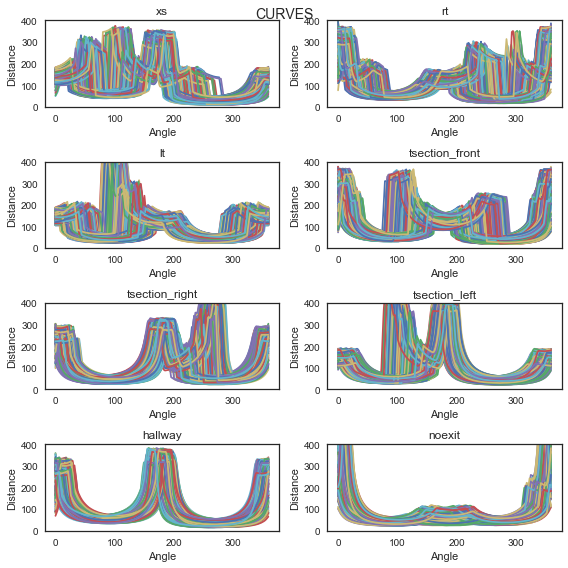

In [57]:
# list of key values
key_value =['xs','rt','lt','tsection_front','tsection_right','tsection_left','hallway','noexit']

def get_labels(file):
    labels = []
    for i, line in enumerate(file):
        labels.append(line.strip().split(','))
    return labels

def get_curves(dir):
    labels = get_labels(open(os.path.join(dir, "labels.txt")))
    all_curves = dict()
    # Create dictionary with 8 key values
    all_curves = {'xs': [], 'rt': [],'lt':[],'tsection_front':[],'tsection_right':[],'tsection_left':[],'hallway':[],'noexit':[]}
    

    for i in range (0,8):
        curves = np.genfromtxt(os.path.join(dir, key_value[i] + ".dat"))
        np.place(curves, curves==0, [curves.max()]) # eliminate zeros (NaN in LIDAR jargon)
        curves = curves.astype(int)
        if curves.ndim < 2:
            curves = np.reshape(curves, [1, len(curves)])
        # smoothing the curve to avoid plenty of local minima in actual LIDAR readings 
        # add the processed values to the keys
        all_curves[key_value[i]].append(scipy.signal.savgol_filter(curves, 5, 1))
    return all_curves, labels

all_curves, labels = get_curves('simulator/data')

# Create a dataframe to store the values of curves

columns = np.append(np.arange(0, 360, 1), ['Curve_class'])
All_Curve_Data = pd.DataFrame(columns=columns)

# Plot the curves
fig = plt.figure(figsize=(8,8))
fig.suptitle("CURVES", fontsize=14)
n = 1

for i in range (0,8):
    curves = all_curves[key_value[i]]    
    ax = fig.add_subplot(4,2,n)
    ax.set_title(key_value[i])
    ax.set_ylabel("Distance")
    ax.set_xlabel("Angle")
    ax.set_ylim(0, 400)
    
    # Plot all 300 x 360 values of each cue and also save the values in dataframe with the cue type
    for k in range(0,300):
        ax.plot(np.arange(0, 360, 1), curves[0][k])
        All_Curve_Data = All_Curve_Data.append(pd.DataFrame([np.append(curves[0][k], [i])], columns=columns))
        
    n=n+1
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.99, wspace=0.4, hspace=0.4)
fig.tight_layout()
plt.show()

In [58]:
print(All_Curve_Data.shape)

(2400, 361)


## Task 2
##### Points 10

Analyze the LIDAR data using a number of clustering methods. Use visualization to analyze the clusters.

Select the best performing method for detailed presentation. Briefly describe other methods and justify your choice.

> Note that you may need to apply appropriate preprocessing techniques to the data prior to applying a clustering technique.

In [59]:
pd.Series(All_Curve_Data.Curve_class).value_counts()

7.0    300
6.0    300
5.0    300
4.0    300
3.0    300
2.0    300
1.0    300
0.0    300
Name: Curve_class, dtype: int64

In [86]:
# Array to store scores of all the clustering methods
adjusted_rand_score = np.array([])
adjusted_mutual_info = np.array([])
homogeneity_score = np.array([])
completeness_score = np.array([])

### K means clustering

K means clustering with number of clusters =2

In [87]:
# Prepare the data for K means clustering
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class
# Use PCA as dimension reduction technique and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
reduced_data= pca.fit_transform(sklearn.preprocessing.scale(x))

km2 = sklearn.cluster.KMeans(n_clusters=2, n_init=20)
km2.fit(reduced_data)
pd.Series(km2.labels_).value_counts()

1    1207
0    1193
dtype: int64

In [88]:
km2.cluster_centers_

array([[  7.41426639e+00,   2.03448833e-02,   1.73485074e-01,
          1.26988510e-01,   3.23012131e-02,  -5.08018966e-02,
         -2.06496816e-01,  -2.19467542e-02,  -1.10137688e-02,
          7.40375176e-02,  -1.70503776e-01,  -1.57788139e-02,
         -1.41654324e-01,  -4.43070880e-02,   5.91625998e-02,
         -2.10036344e-02,   4.78848366e-02,   3.38266790e-02,
          7.98129868e-02,   6.17330272e-03,   2.37141948e-02,
         -6.29735323e-04,  -6.45861152e-03,   2.87844128e-03,
         -4.40594533e-03,  -3.11524839e-03,  -9.67318615e-03,
          1.39542442e-02,   5.63832431e-03,   8.06689113e-03,
          6.65257813e-03,   1.38010650e-02,   9.78708582e-03,
          5.39819753e-03,   1.23838874e-03,  -1.20239751e-03,
          1.27851368e-03,   9.83028296e-03,  -4.02742211e-03,
          1.42297434e-02,   3.54132616e-03,  -8.01941958e-03,
         -1.54927876e-03,  -1.03400822e-02,  -1.23223295e-03,
          1.60882623e-03,   1.45273210e-02,  -9.58971813e-03,
        

In [89]:
km2.labels_

array([0, 0, 0, ..., 1, 1, 0])

In [90]:
# Calculate the score for clustering
score = sklearn.metrics.adjusted_rand_score(y,km2.labels_)
adjusted_rand_score = np.append(adjusted_rand_score,score)
print("Adjusted Rand score : {}".format(score))

score = metrics.adjusted_mutual_info_score(y,km2.labels_)
adjusted_mutual_info = np.append(adjusted_mutual_info,score)
print("Adjusted Mutual Info score : {}".format(score))

score = metrics.homogeneity_score(y,km2.labels_)
homogeneity_score = np.append(homogeneity_score,score)
print("Homogeneity score : {}".format(score))

score = metrics.completeness_score(y,km2.labels_)
completeness_score = np.append(completeness_score,score)
print("Completeness score : {}".format(score))


Adjusted Rand score : 0.0556804087610825
Adjusted Mutual Info score : 0.06014484746824563
Homogeneity score : 0.06080521821538887
Completeness score : 0.18242013232933646


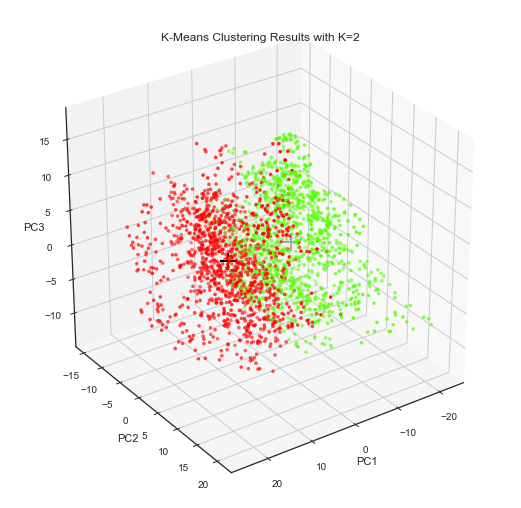

In [91]:
# Plot the K-means cluster
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1,projection='3d')
ax1.scatter(reduced_data[:,0], reduced_data[:,1],reduced_data[:,2],s=10, c=km2.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1],km2.cluster_centers_[:,2], marker='+', s=300, c='k', linewidth=2)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.view_init(30, 55)
plt.draw()

K means clustering with number of clusters =3

In [92]:
# Prepare the data for K means clustering
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class
# Use PCA as dimension reduction technique and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
reduced_data= pca.fit_transform(sklearn.preprocessing.scale(x))
km3 = sklearn.cluster.KMeans(n_clusters=3, n_init=20)
km3.fit(reduced_data)
pd.Series(km3.labels_).value_counts()

1    960
0    771
2    669
dtype: int64

In [93]:
km3.cluster_centers_

array([[ -7.65134868e+00,  -4.90088741e+00,  -1.57787544e+00, ...,
          3.17582856e-18,   7.61908577e-17,  -9.74141727e-19],
       [  8.63932005e+00,  -1.25995393e+00,  -5.32856271e-01, ...,
         -1.21366790e-17,   7.12378536e-17,   1.18843778e-17],
       [ -3.57930854e+00,   7.45611355e+00,   2.58308518e+00, ...,
          1.87446068e-17,   7.88576299e-17,  -2.53326094e-19]])

In [94]:
km3.labels_

array([1, 1, 1, ..., 0, 2, 2])

In [95]:
# Calculate the score for clustering
score = sklearn.metrics.adjusted_rand_score(y,km3.labels_)
adjusted_rand_score = np.append(adjusted_rand_score,score)
print("Adjusted Rand score : {}".format(score))

score = metrics.adjusted_mutual_info_score(y,km3.labels_)
adjusted_mutual_info = np.append(adjusted_mutual_info,score)
print("Adjusted Mutual Info score : {}".format(score))

score = metrics.homogeneity_score(y,km3.labels_)
homogeneity_score = np.append(homogeneity_score,score)
print("Homogeneity score : {}".format(score))

score = metrics.completeness_score(y,km3.labels_)
completeness_score = np.append(completeness_score,score)
print("Completeness score : {}".format(score))

Adjusted Rand score : 0.08800005067412975
Adjusted Mutual Info score : 0.1165899435306565
Homogeneity score : 0.11783223042111254
Completeness score : 0.22533262667404305


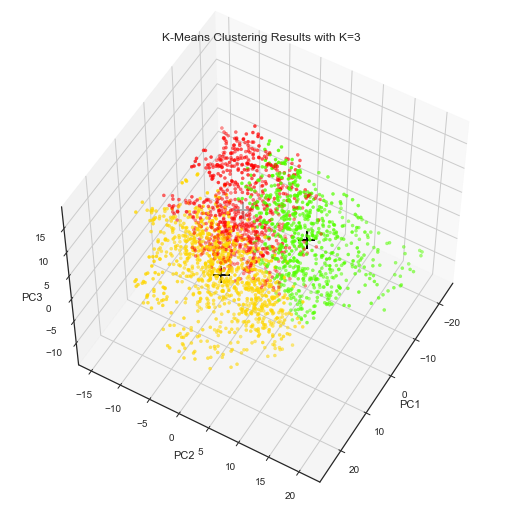

In [96]:
# Plot the K-means cluster
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1,projection='3d')
ax1.scatter(reduced_data[:,0], reduced_data[:,1],reduced_data[:,2],s=10, c=km3.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=3')
ax1.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1],km3.cluster_centers_[:,2], marker='+', s=300, c='k', linewidth=2)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

ax1.view_init(55, 30)
plt.draw()

K means clustering with number of clusters =4

In [97]:
# Prepare the data for K means clustering
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class
# Use PCA as dimension reduction technique and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
reduced_data= pca.fit_transform(sklearn.preprocessing.scale(x))
km4 = sklearn.cluster.KMeans(n_clusters=4, n_init=20)
km4.fit(reduced_data)
pd.Series(km4.labels_).value_counts()

2    734
3    710
1    673
0    283
dtype: int64

In [98]:
km4.cluster_centers_

array([[ -8.27370423e+00,   7.62847047e+00,   4.37663938e+00, ...,
          5.14934011e-18,   8.02911897e-17,   1.47022604e-17],
       [  2.34811095e+00,   5.95970524e+00,  -1.14382136e+00, ...,
         -6.14145369e-18,   7.73343266e-17,   3.42897225e-18],
       [ -7.72131127e+00,  -4.58045621e+00,  -1.15987179e+00, ...,
          1.34719245e-17,   7.56304251e-17,   1.58596975e-18],
       [  9.05439733e+00,  -3.95448439e+00,   5.38801021e-01, ...,
         -5.45769518e-18,   6.98677529e-17,   4.02242878e-18]])

In [99]:
km4.labels_

array([3, 3, 1, ..., 2, 2, 1])

In [100]:
# Calculate the score for clustering
score = sklearn.metrics.adjusted_rand_score(y,km4.labels_)
adjusted_rand_score = np.append(adjusted_rand_score,score)
print("Adjusted Rand score : {}".format(score))

score = metrics.adjusted_mutual_info_score(y,km4.labels_)
adjusted_mutual_info = np.append(adjusted_mutual_info,score)
print("Adjusted Mutual Info score : {}".format(score))

score = metrics.homogeneity_score(y,km4.labels_)
homogeneity_score = np.append(homogeneity_score,score)
print("Homogeneity score : {}".format(score))

score = metrics.completeness_score(y,km4.labels_)
completeness_score = np.append(completeness_score,score)
print("Completeness score : {}".format(score))

Adjusted Rand score : 0.10099742973067272
Adjusted Mutual Info score : 0.1528855214041439
Homogeneity score : 0.1546744628868915
Completeness score : 0.24160278275000494


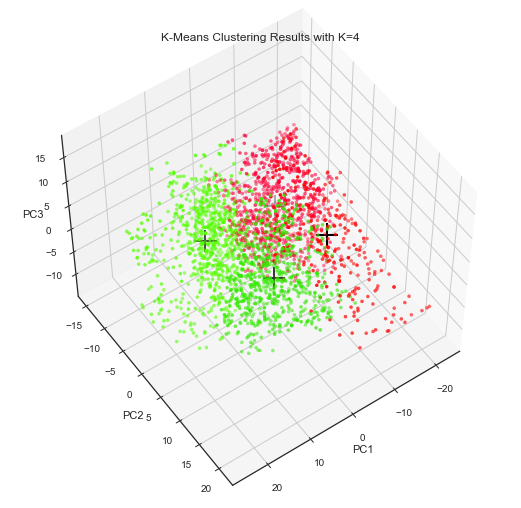

In [101]:
# Plot the K-means cluster
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1,projection='3d')
ax1.scatter(reduced_data[:,0], reduced_data[:,1],reduced_data[:,2],s=10, c=km4.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=4')
ax1.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],km4.cluster_centers_[:,2], marker='+', s=500, c='k', linewidth=2)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.view_init(55, 55)
plt.draw()

K means clustering with number of clusters =8

In [102]:
# Prepare the data for K means clustering
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class
# Use PCA as dimension reduction technique and scale as preprocessing technique
reduced_data= pca.fit_transform(sklearn.preprocessing.scale(x))
km8 = sklearn.cluster.KMeans(n_clusters=8, n_init=20)
km8.fit(reduced_data)
pd.Series(km8.labels_).value_counts()

3    460
6    405
1    386
2    384
5    350
0    154
7    133
4    128
dtype: int64

In [103]:
km8.cluster_centers_

array([[ -6.43069849e+00,  -4.77608858e+00,  -6.89109022e+00, ...,
          1.63184785e-18,   5.01355428e-17,   8.71393062e-18],
       [  7.15937415e-01,   5.88759752e+00,  -5.55230548e+00, ...,
          9.45005563e-18,   8.05003804e-17,   7.47951614e-18],
       [ -1.10756446e+01,  -4.33274730e+00,   1.07388799e+00, ...,
          3.18347730e-17,   8.95032709e-17,  -4.13325394e-18],
       ..., 
       [ -1.22637615e+00,   4.85623401e+00,   5.54653074e+00, ...,
         -7.55498014e-18,   8.29069494e-17,   6.97570700e-18],
       [  1.28810320e+01,  -3.33488507e-02,  -6.35360596e-01, ...,
          2.36609672e-17,   6.62772903e-17,  -8.48724927e-18],
       [ -9.44452901e+00,   1.19349671e+01,   1.43411854e+00, ...,
          5.24664664e-18,   8.32018828e-17,   8.98619820e-18]])

In [104]:
km8.labels_

array([6, 6, 1, ..., 2, 5, 5])

In [105]:
# Calculate the score for clustering
score = sklearn.metrics.adjusted_rand_score(y,km8.labels_)
adjusted_rand_score = np.append(adjusted_rand_score,score)
print("Adjusted Rand score : {}".format(score))

score = metrics.adjusted_mutual_info_score(y,km8.labels_)
adjusted_mutual_info = np.append(adjusted_mutual_info,score)
print("Adjusted Mutual Info score : {}".format(score))

score = metrics.homogeneity_score(y,km8.labels_)
homogeneity_score = np.append(homogeneity_score,score)
print("Homogeneity score : {}".format(score))

score = metrics.completeness_score(y,km8.labels_)
completeness_score = np.append(completeness_score,score)
print("Completeness score : {}".format(score))

Adjusted Rand score : 0.1827760757378896
Adjusted Mutual Info score : 0.3319396543660173
Homogeneity score : 0.33524422682310845
Completeness score : 0.35249989431984025


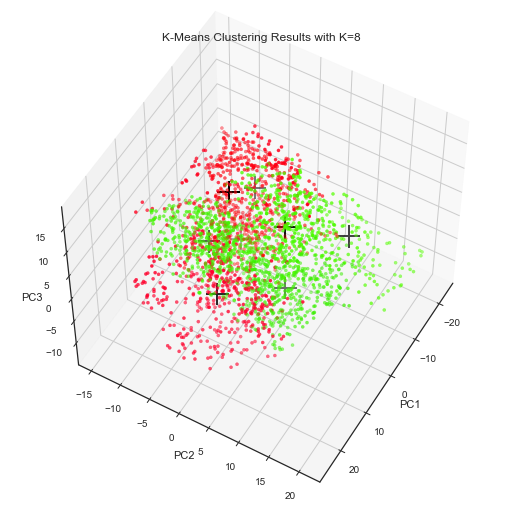

In [106]:
# Plot the K means clustering
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1,projection='3d')
ax1.scatter(reduced_data[:,0], reduced_data[:,1],reduced_data[:,2],s=10, c=km8.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=8')
ax1.scatter(km8.cluster_centers_[:,0], km8.cluster_centers_[:,1],km8.cluster_centers_[:,2], marker='+', s=500, c='k', linewidth=2)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.view_init(55, 30)
plt.draw()

### Hierarchial Clustering using Scipy

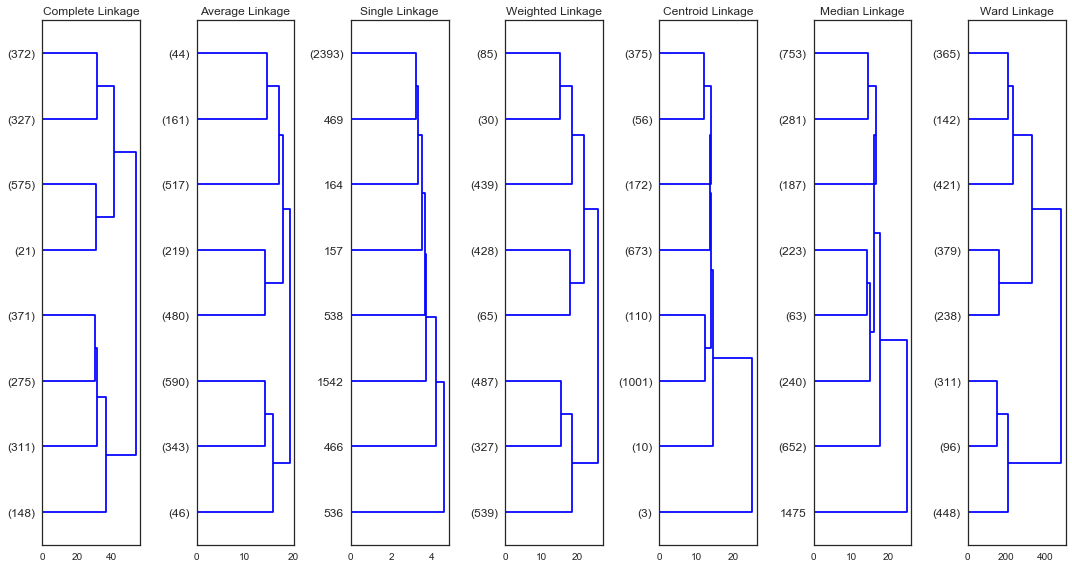

In [107]:
# Prepare the data
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class

# Declare an array to store labels
label_str = np.array([])

# Use PCA as dimension reduction method and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
df_plot= pca.fit_transform(sklearn.preprocessing.scale(x))
no_of_PCA = 3

# Find clusters for different types of linkages
linkage_names =['complete','average','single','weighted','centroid','median','ward']


plt.figure(figsize=(10,20))

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7, figsize=(15,8))
y_true_labels = ['(300)', '(300)', '(300)', '(300)', '(300)', '(300)', '(300)', '(300)']
for linkage, cluster, ax in zip([scipy.cluster.hierarchy.complete(df_plot[:,:no_of_PCA]), 
                                 scipy.cluster.hierarchy.average(df_plot[:,:no_of_PCA]), 
                                 scipy.cluster.hierarchy.single(df_plot[:,:no_of_PCA]),
                                 scipy.cluster.hierarchy.weighted(df_plot[:,:no_of_PCA]), 
                                 scipy.cluster.hierarchy.centroid(df_plot[:,:no_of_PCA]), 
                                 scipy.cluster.hierarchy.median(df_plot[:,:no_of_PCA]), 
                                 scipy.cluster.hierarchy.ward(df_plot[:,:no_of_PCA])],
                                ['c1','c2','c3','c4','c5','c6','c7'],
                                [ax1,ax2,ax3,ax4,ax5,ax6,ax7]):
    cluster = scipy.cluster.hierarchy.dendrogram(linkage,truncate_mode='lastp', p=8, ax=ax,orientation='right',color_threshold=0,show_leaf_counts=True)
    # Store the labels for all 7 types of linkages
    label_str = np.append(label_str,cluster['ivl'])
    

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage')
ax4.set_title('Weighted Linkage')
ax5.set_title('Centroid Linkage')
ax6.set_title('Median Linkage')
ax7.set_title('Ward Linkage')
fig.tight_layout()



In [108]:
# Calculate the accuracy of Clustering methods for PCA = 3 components

# Get true labels
y_true =  All_Curve_Data.Curve_class.ravel()

clustering_types = ['complete','average','single','weighted','centroid','median','ward']

# Decare an array to store value of predicted labels
label_pred =np.array([])

# Convert the labels from string to int
for i in range(0,56):
    labels_stripped = label_str[i].strip('()')
    label_pred = np.append(label_pred,labels_stripped)
label_pred = label_pred.astype(int)

print("Scores for hierarchial clustering with PCA components =3\n")
index =0

# Calculate the scores for allt he linkage types
for i in range (0,7):
    y_pred =np.array([])
    y_pred_count = label_pred[index:index+8]
    for j in range (0,8):
        count = y_pred_count[j]
        for m in range (0,count):
            y_pred = np.append(y_pred,j)
    shape = int(y_pred.shape[0])
    
    # Sometimes clustering returns labels with a size larger than the size of the original data
    # andhence, scores cannot be calculated for larger data
    if(shape<= 2400):

        # Calculate the score for clustering
        score1 = sklearn.metrics.adjusted_rand_score(y_true,y_pred)
        score2 = metrics.adjusted_mutual_info_score(y_true,y_pred)
        score3 = metrics.homogeneity_score(y_true,y_pred)
        score4 = metrics.completeness_score(y_true,y_pred)     
        
    else:
        score1=0
        score2=0
        score3=0
        score4=0
        
    adjusted_rand_score = np.append(adjusted_rand_score,score1)
    print("{} Linkage : Adjusted Rand score : {}".format(clustering_types[i],score1))
    adjusted_mutual_info = np.append(adjusted_mutual_info,score2)
    print("{} Linkage : Adjusted Mutual Info score : {}".format(clustering_types[i],score2))
    homogeneity_score = np.append(homogeneity_score,score3)
    print("{} Linkage : Homogeneity score : {}".format(clustering_types[i],score3))
    completeness_score = np.append(completeness_score,score4)
    print("{} Linkage :Completeness score : {}\n".format(clustering_types[i],score4))
    print("------------------------------------------------------------------------\n")
        
    index = index+8
    

Scores for hierarchial clustering with PCA components =3

complete Linkage : Adjusted Rand score : 0.5089790242916221
complete Linkage : Adjusted Mutual Info score : 0.6772669716793897
complete Linkage : Homogeneity score : 0.6788868704269704
complete Linkage :Completeness score : 0.7361086274957522

------------------------------------------------------------------------

average Linkage : Adjusted Rand score : 0.5001051356490805
average Linkage : Adjusted Mutual Info score : 0.6551844421888521
average Linkage : Homogeneity score : 0.6569048077814995
average Linkage :Completeness score : 0.7487411581131104

------------------------------------------------------------------------

single Linkage : Adjusted Rand score : 0
single Linkage : Adjusted Mutual Info score : 0
single Linkage : Homogeneity score : 0
single Linkage :Completeness score : 0

------------------------------------------------------------------------

weighted Linkage : Adjusted Rand score : 0.5614436602314463
weighted

### Hierarchial Clustering using Scikit Learn 

In [109]:
# Function to plot the different clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))

    plt.scatter(X_red[:, 0], X_red[:, 1], c=labels,
                cmap=plt.cm.spectral)

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

ward Linkage : Adjusted Rand score : 0.6266957634106208
ward Linkage : Adjusted Mutual Info score : 0.7461143796877521
ward Linkage : Homogeneity score : 0.7473703721001534
ward Linkage :Completeness score : 0.7823254272774371

------------------------------------------------------------------------

average Linkage : Adjusted Rand score : 0.6266957634106208
average Linkage : Adjusted Mutual Info score : 0.7461143796877521
average Linkage : Homogeneity score : 0.7473703721001534
average Linkage :Completeness score : 0.7823254272774371

------------------------------------------------------------------------

complete Linkage : Adjusted Rand score : 0.6266957634106208
complete Linkage : Adjusted Mutual Info score : 0.7461143796877521
complete Linkage : Homogeneity score : 0.7473703721001534
complete Linkage :Completeness score : 0.7823254272774371

------------------------------------------------------------------------



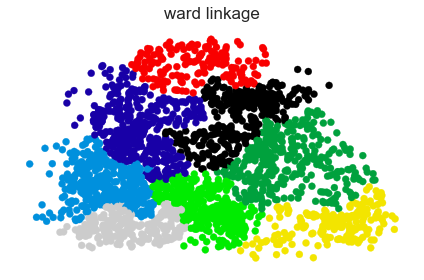

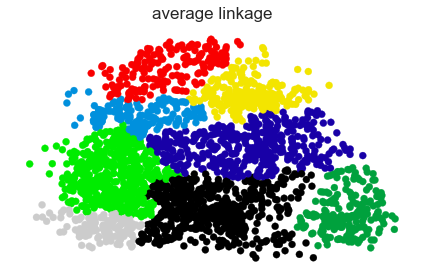

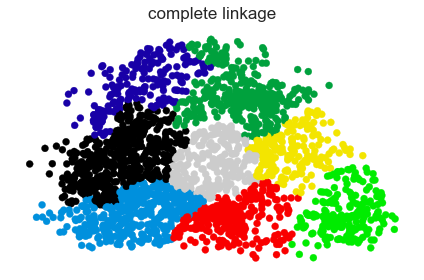

In [110]:
# Prepare the data
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class

# use SpectralEmbedding as dimension reduction technique and scale as preprocessing technique
X_reduced= sklearn.manifold.SpectralEmbedding(n_components=2).fit_transform(sklearn.preprocessing.scale(x))

# Clustering on different types of linkages
for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=8)
    clustering.fit(X_reduced)
    
    # Calculate the score for clustering
    score1 = sklearn.metrics.adjusted_rand_score(y_true,y_pred)
    score2 = metrics.adjusted_mutual_info_score(y_true,y_pred)
    score3 = metrics.homogeneity_score(y_true,y_pred)
    score4 = metrics.completeness_score(y_true,y_pred)
    
    adjusted_rand_score = np.append(adjusted_rand_score,score1)
    print("{} Linkage : Adjusted Rand score : {}".format(linkage,score1))
    adjusted_mutual_info = np.append(adjusted_mutual_info,score2)
    print("{} Linkage : Adjusted Mutual Info score : {}".format(linkage,score2))
    homogeneity_score = np.append(homogeneity_score,score3)
    print("{} Linkage : Homogeneity score : {}".format(linkage,score3))
    completeness_score = np.append(completeness_score,score4)
    print("{} Linkage :Completeness score : {}\n".format(linkage,score4))
    print("------------------------------------------------------------------------\n")
    
    plot_clustering(X_reduced, x, clustering.labels_, "{} linkage".format(linkage))
    
plt.tight_layout()
plt.show()

ward Linkage : Adjusted Rand score : 0.6266957634106208
ward Linkage : Adjusted Mutual Info score : 0.7461143796877521
ward Linkage : Homogeneity score : 0.7473703721001534
ward Linkage :Completeness score : 0.7823254272774371

------------------------------------------------------------------------

average Linkage : Adjusted Rand score : 0.6266957634106208
average Linkage : Adjusted Mutual Info score : 0.7461143796877521
average Linkage : Homogeneity score : 0.7473703721001534
average Linkage :Completeness score : 0.7823254272774371

------------------------------------------------------------------------

complete Linkage : Adjusted Rand score : 0.6266957634106208
complete Linkage : Adjusted Mutual Info score : 0.7461143796877521
complete Linkage : Homogeneity score : 0.7473703721001534
complete Linkage :Completeness score : 0.7823254272774371

------------------------------------------------------------------------



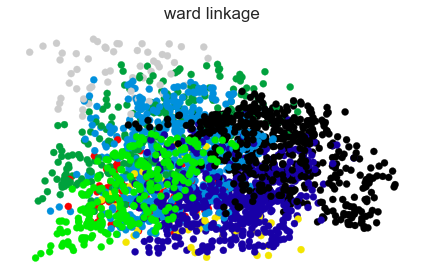

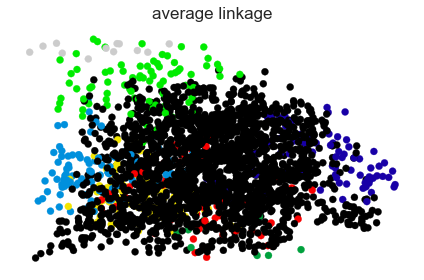

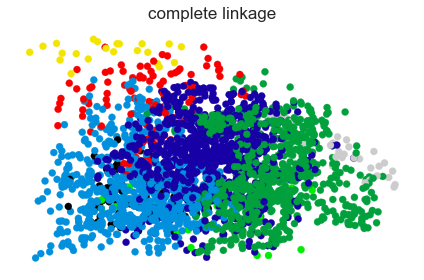

In [111]:
# Prepare the data
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class

# use PCA as dimension reduction technique and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
X_reduced= pca.fit_transform(sklearn.preprocessing.scale(x))

# Clustering on different types of linkages
for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=8)
    clustering.fit(X_reduced)
    
    # Calculate the score for clustering
    score1 = sklearn.metrics.adjusted_rand_score(y_true,y_pred)
    score2 = metrics.adjusted_mutual_info_score(y_true,y_pred)
    score3 = metrics.homogeneity_score(y_true,y_pred)
    score4 = metrics.completeness_score(y_true,y_pred)
    
    adjusted_rand_score = np.append(adjusted_rand_score,score1)
    print("{} Linkage : Adjusted Rand score : {}".format(linkage,score1))
    adjusted_mutual_info = np.append(adjusted_mutual_info,score2)
    print("{} Linkage : Adjusted Mutual Info score : {}".format(linkage,score2))
    homogeneity_score = np.append(homogeneity_score,score3)
    print("{} Linkage : Homogeneity score : {}".format(linkage,score3))
    completeness_score = np.append(completeness_score,score4)
    print("{} Linkage :Completeness score : {}\n".format(linkage,score4))
    print("------------------------------------------------------------------------\n")
    
    plot_clustering(X_reduced, x, clustering.labels_, "{} linkage".format(linkage))
    
plt.tight_layout()
plt.show()

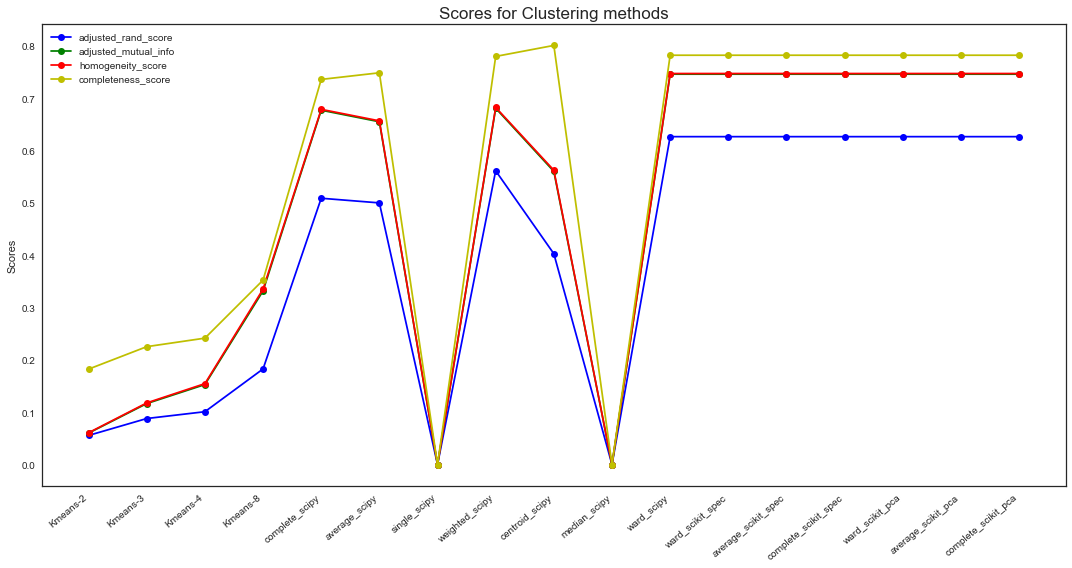

In [113]:
# Plot the scores of different clustering methods

clustering_methods = ['Kmeans-2','Kmeans-3','Kmeans-4','Kmeans-8','complete_scipy','average_scipy','single_scipy',
                      'weighted_scipy','centroid_scipy','median_scipy','ward_scipy','ward_scikit_spec', 
                      'average_scikit_spec', 'complete_scikit_spec','ward_scikit_pca', 
                      'average_scikit_pca', 'complete_scikit_pca',
                      ]

plt.figure(figsize=(15, 8))
x = np.arange(1,18,1)

plt.plot(x,adjusted_rand_score,'-bo',label='adjusted_rand_score')
plt.plot(x,adjusted_mutual_info,'-go',label='adjusted_mutual_info')
plt.plot(x,homogeneity_score,'-ro',label='homogeneity_score')
plt.plot(x,completeness_score,'-yo',label='completeness_score')
plt.legend(loc='upper left')


plt.xticks(x, clustering_methods,rotation='40',horizontalalignment='right')

plt.ylabel("Scores")
plt.title("Scores for Clustering methods", size=17)
plt.tight_layout()

The clustering method performance evaluation can be analysed by considering the scores and observing the plots. Closer the score to 1, better the clustering performance. 

For K-means clustering, it can be observed that the clusters are overlapping and the scores do not even cross 50%. So the K-means clustering is not suited for this data.

For hiearchial clustering using scipy, it can be observed that the label values returned for each class for complete, ward,centroid average and weighted are better than the single and median linkage. The scores for median and single linkage are 0 and so they are not good clustering methods. Complete, Ward,Average and Centroid linkages have score closer to 0.5 and there is not much difference between their scores and hence, it cannot be decided for certain that one amongst them is the better method.

It can be observed for agglomerative hierarchial clustering, the clustering with spectral embedding technique is similar to PCA dimension reduction technique. Also the data is clustered well into separate groups. The score is  above 50%, this method can be considered for clustering the data with noise as the clusters are observed to be properly segregated.

Thus, it can be observed that Hierarchial clustering is better than the K-means clustering. This method can be considered for clustering for data with noise

It can be observed that anyone of the Ward linkage using scipy, ward , complete, average clustering using agglomerative clustering is the best clustering methods for data without noise as the scores are similar

## Task 3
##### Points 10

Classify the LIDAR data using a number of approaches. Use visualization as appropriate.

Select the best performing method for detailed presentation. Briefly describe other methods and justify your choice.

> Note that you may need to apply appropriate preprocessing techniques to the data prior to applying a clustering technique.

In [114]:
# Array to store all classification scores
f1_score = np.array([])
precision_score = np.array([])
accuracy_score = np.array([])

### LVQ

In [119]:
#calculate the distance between two vectors
def calculate_distance(row1, row2):
    distance = scipy.spatial.distance.correlation(row1, row2)
    return distance
 

# Locate the best matching unit
def get_best_matching_unit(codebooks, test_row):
    distances = list()
    for codebook in codebooks:
        dist = calculate_distance(codebook, test_row)
        distances.append((codebook, dist))
    distances.sort(key=lambda tup: tup[1])
    return distances[0][0]

# Create a random codebook vector
def random_codebook(train):
    n_records = len(train)
    n_features = len(train[0])
    codebook = [train[random.randrange(n_records)][i] for i in range(n_features)]
    return codebook

# Train a set of codebook vectors
def train_codebooks(train, n_codebooks, lrate, epochs):
    codebooks = [random_codebook(train) for i in range(n_codebooks)]
    for epoch in range(epochs):
        rate = lrate * (1.0-(epoch/float(epochs)))
        sum_error = 0.0
        for row in train:
            bmu = get_best_matching_unit(codebooks, row)
            for i in range(len(row)-1):
                error = row[i] - bmu[i]
                sum_error += error**2
                if bmu[-1] == row[-1]:
                    bmu[i] -= rate * error
                else:
                    bmu[i] +=(rate * error)
         
    return codebooks


# Test the training function

learn_rate = 0.1
n_epochs = 20
n_codebooks = 8
dataset = All_Curve_Data.as_matrix()

codebooks_ret = train_codebooks(dataset, n_codebooks, learn_rate, n_epochs)

codebooks_ret = np.asarray(codebooks_ret)

codebooks_ret = codebooks_ret.reshape((8, 361))
codebooks_ret =  np.delete(codebooks_ret,360,1)


In [120]:
print(codebooks_ret.shape)

(8, 360)


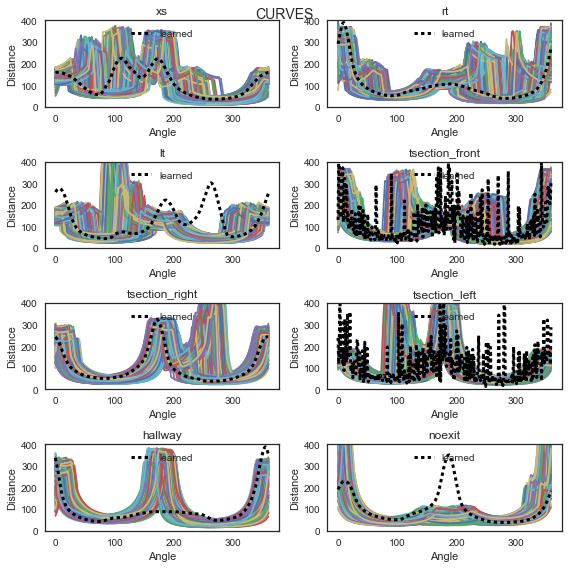

In [121]:
# list of key values
key_value =['xs','rt','lt','tsection_front','tsection_right','tsection_left','hallway','noexit']
# Plot the curves
fig = plt.figure(figsize=(8,8))
fig.suptitle("CURVES", fontsize=14)
n = 1

for i in range (0,8):
    curves = all_curves[key_value[i]]    
    ax = fig.add_subplot(4,2,n)
    ax.set_title(key_value[i])
    ax.set_ylabel("Distance")
    ax.set_xlabel("Angle")
    ax.set_ylim(0, 400)
  
    # Plot all 300 x 360 values of each cue and also save the values in dataframe with the cue type
    for k in range(0,300):
        ax.plot(np.arange(0, 360, 1), curves[0][k])
        if(k==299):
            ax.plot(np.arange(0, 360, 1), codebooks_ret[n-1],linestyle=':', color='k', linewidth=3,label='learned')
            ax.legend(loc='upper center')
        
    n=n+1
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.99, wspace=0.4, hspace=0.4)
fig.tight_layout()
plt.show()

### K nearest neighbors

Confusion matrix for Knn 1 neighbor 

---------------------------------------------------------------------------

True       0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0
Predicted                                        
0.0        131    0    0    0    0    0    0    0
1.0          0  116    0    0    0    0    0    0
2.0          0    1  115    0    0    0    0    0
3.0          0    0    0  107    0    0    0    0
4.0          1    0    0    0  137    0    0    0
5.0          0    0    0    0    0  112    0    0
6.0          0    0    0    0    0    0  123    0
7.0          0    0    0    0    0    0    0  117


Classification report for Knn 1 neighbor 

             precision    recall  f1-score   support

        0.0      1.000     0.992     0.996       132
        1.0      1.000     0.991     0.996       117
        2.0      0.991     1.000     0.996       115
        3.0      1.000     1.000     1.000       107
        4.0      0.993     1.000     0.996       137
        5.0      1.00

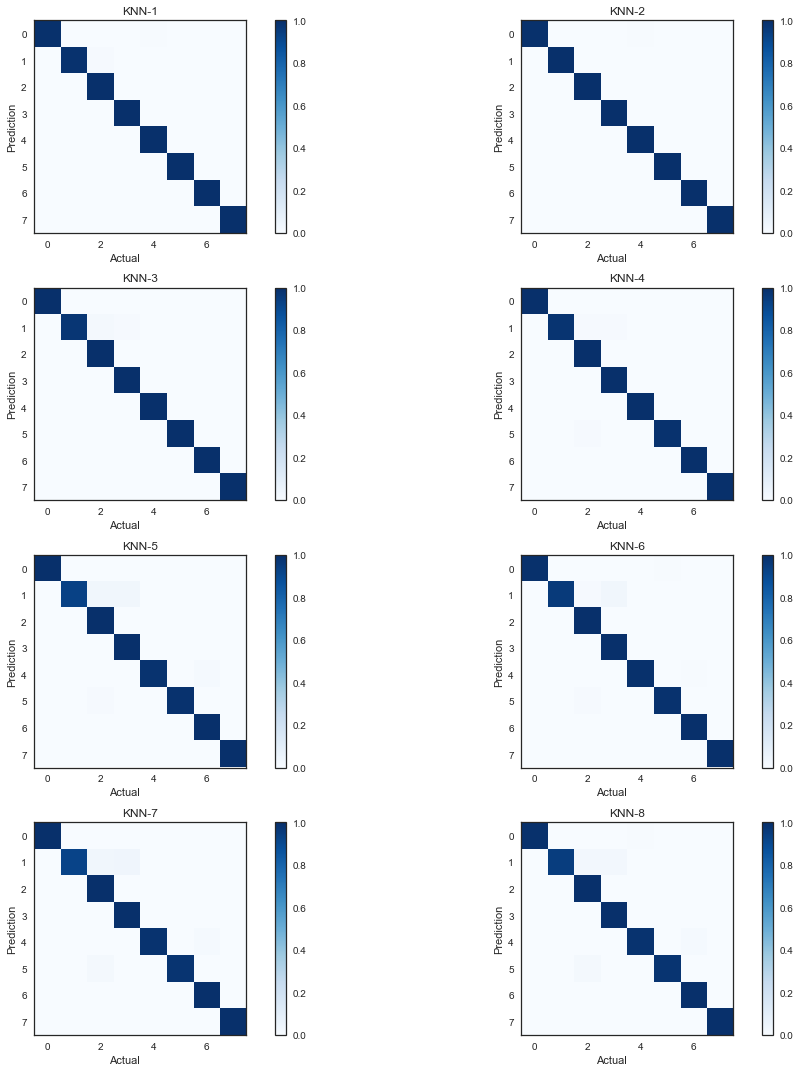

In [122]:
# Prepare the data
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class

# use PCA as dimension reduction technique and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
X_reduced= pca.fit_transform(sklearn.preprocessing.scale(x))

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_reduced, y, train_size=0.6) 

n=1
fig = plt.figure(figsize=(15,15))

for j in range (1,9):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=j)
    knn.fit(X_train,y_train)
    pred = knn.fit(X_train, y_train).predict(X_test)
    cm_df = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test,pred).T, index=knn.classes_,columns=knn.classes_)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    cm = sklearn.metrics.confusion_matrix(y_test, pred)

    print("Confusion matrix for Knn {} neighbor \n".format(j))
    print("---------------------------------------------------------------------------\n")
    print(cm_df)
    
    print("\n")
    print("Classification report for Knn {} neighbor \n".format(j))
    print(sklearn.metrics.classification_report(y_test, pred, digits=3))
    print("---------------------------------------------------------------------------\n")
    
    score = sklearn.metrics.f1_score(y_test, pred,average ='weighted')
    f1_score =np.append(f1_score,score)
    
    score = sklearn.metrics.precision_score(y_test, pred,average ='weighted')  
    precision_score = np.append(precision_score,score)
                                            
    score = sklearn.metrics.accuracy_score(y_test, pred)  
    accuracy_score = np.append(accuracy_score,score)                                        
                                            
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

    
    ax = fig.add_subplot(4,2,n)
    im= ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    ax=plt.gca()
    ax.grid(linestyle='')
    fig.colorbar(im)
    ax.set_title('KNN-{}'.format(j))

    ax.set_xlabel('Actual',rotation='horizontal', ha='right')
    ax.set_ylabel('Prediction')
    n=n+1

plt.subplots_adjust(left=None, bottom=None, right=None, top=0.99, wspace=0.4, hspace=0.4)
fig.tight_layout()
plt.show()

### Logistic Regression

Confusion matrix for Logistic Regression 

---------------------------------------------------------------------------

True       0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0
Predicted                                        
0.0        119    0    0    0    0    0    0    0
1.0          0  123    0    1    0    0    0    0
2.0          0    0  123    3    0    0    0    0
3.0          1    9    2  102    0    0    2    0
4.0          0    0    0    9  116    0    0    0
5.0          1    0    0    0    0  121    0    0
6.0          0    0    0    0    4    0  111    0
7.0          0    0    0    0    0    0    0  113


Classification report for Logistic Regression 

             precision    recall  f1-score   support

        0.0      1.000     0.983     0.992       121
        1.0      0.992     0.932     0.961       132
        2.0      0.976     0.984     0.980       125
        3.0      0.879     0.887     0.883       115
        4.0      0.928     0.967     0.947       120
        5.0

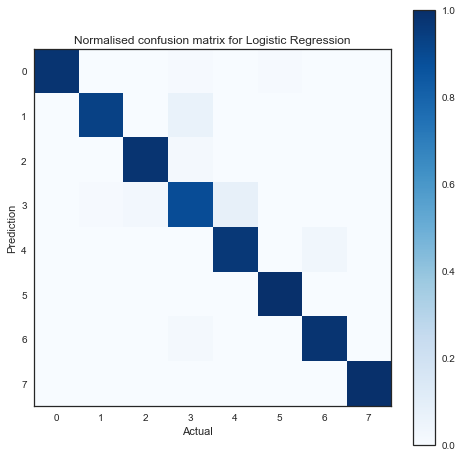

In [123]:
# Prepare the data
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class

# use PCA as dimension reduction technique and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
X_reduced= pca.fit_transform(sklearn.preprocessing.scale(x))

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_reduced, y, train_size=0.6)

fig = plt.figure(figsize=(8,8))

clf = sklearn.linear_model.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y_train)
prob = clf.predict_proba(X_test) 
pred = clf.predict(X_test)
    

cm_df = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test,pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm = sklearn.metrics.confusion_matrix(y_test, pred)

print("Confusion matrix for Logistic Regression \n")
print("---------------------------------------------------------------------------\n")
print(cm_df)
    
print("\n")
print("Classification report for Logistic Regression \n")
print(sklearn.metrics.classification_report(y_test, pred,digits=3))
print("---------------------------------------------------------------------------\n")

score = sklearn.metrics.f1_score(y_test, pred,average ='weighted')
f1_score =np.append(f1_score,score)

score = sklearn.metrics.precision_score(y_test, pred,average ='weighted')  
precision_score = np.append(precision_score,score)

score = sklearn.metrics.accuracy_score(y_test, pred)  
accuracy_score = np.append(accuracy_score,score)   

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

    
ax = fig.add_subplot(1,1,1)
im= ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax=plt.gca()
ax.grid(linestyle='')
fig.colorbar(im)
ax.set_title('Normalised confusion matrix for Logistic Regression')

ax.set_xlabel('Actual',rotation='horizontal', ha='right')
ax.set_ylabel('Prediction')

plt.show()

### LDA

Confusion matrix for Linear Discriminant Analysis 

---------------------------------------------------------------------------

True       0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0
Predicted                                        
0.0         97    0    0    0    1    2    0    0
1.0          0  105    0    2    1    0    0    1
2.0          0    0  119    4    0    0    0    0
3.0          0    2    5  114    1    0    0    2
4.0          9    0    0    0  108    0    1    0
5.0         13    0    0    0    0  119    0    0
6.0          0    0    0    0   15    0  123    0
7.0          0    2    0    0    0    0    0  114


Classification report for Linear Discriminant Analysis 

             precision    recall  f1-score   support

        0.0      0.970     0.815     0.886       119
        1.0      0.963     0.963     0.963       109
        2.0      0.967     0.960     0.964       124
        3.0      0.919     0.950     0.934       120
        4.0      0.915     0.857     0.885    

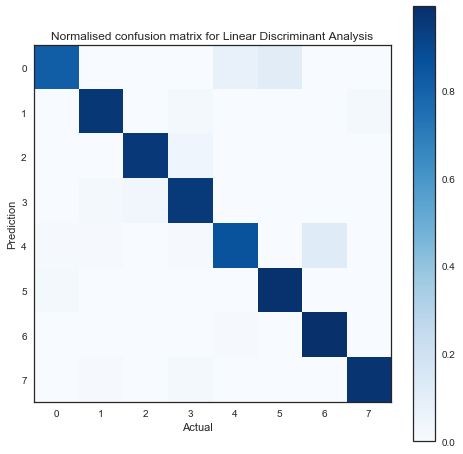

In [124]:
# Prepare the data
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class

# use PCA as dimension reduction technique and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
X_reduced= pca.fit_transform(sklearn.preprocessing.scale(x))

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_reduced, y, train_size=0.6)

fig = plt.figure(figsize=(8,8))

clf = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd')
clf.fit(X_train,y_train)
prob = clf.predict_proba(X_test) 
pred = clf.predict(X_test)
    

cm_df = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test,pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm = sklearn.metrics.confusion_matrix(y_test, pred)

print("Confusion matrix for Linear Discriminant Analysis \n")
print("---------------------------------------------------------------------------\n")
print(cm_df)
    
print("\n")
print("Classification report for Linear Discriminant Analysis \n")
print(sklearn.metrics.classification_report(y_test, pred,digits=3))
print("---------------------------------------------------------------------------\n")

score = sklearn.metrics.f1_score(y_test, pred,average ='weighted')
f1_score =np.append(f1_score,score)

score = sklearn.metrics.precision_score(y_test, pred,average ='weighted')  
precision_score = np.append(precision_score,score)

score = sklearn.metrics.accuracy_score(y_test, pred)  
accuracy_score = np.append(accuracy_score,score)   

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

    
ax = fig.add_subplot(1,1,1)
im= ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax=plt.gca()
ax.grid(linestyle='')
fig.colorbar(im)
ax.set_title('Normalised confusion matrix for Linear Discriminant Analysis')

ax.set_xlabel('Actual',rotation='horizontal', ha='right')
ax.set_ylabel('Prediction')

plt.show()

### QDA

c:\program files\python36\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Confusion matrix for Quadratic Discriminant Analysis 

---------------------------------------------------------------------------

True       0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0
Predicted                                        
0.0        106    0    0    0    0    9    0    0
1.0          1  108    1    6    0    0    4    2
2.0          7    6  125    1    1    2    0    3
3.0          0    9    2   98    3    0    2    0
4.0          0    6    0    6  110    8   35   12
5.0          3    1    0    6    1   95    8    5
6.0          0    0    0    1    0    2   66    2
7.0          0    3    0    2    3    0    2   87


Classification report for Quadratic Discriminant Analysis 

             precision    recall  f1-score   support

        0.0      0.922     0.906     0.914       117
        1.0      0.885     0.812     0.847       133
        2.0      0.862     0.977     0.916       128
        3.0      0.860     0.817     0.838       120
        4.0      0.621     0.932     0.7

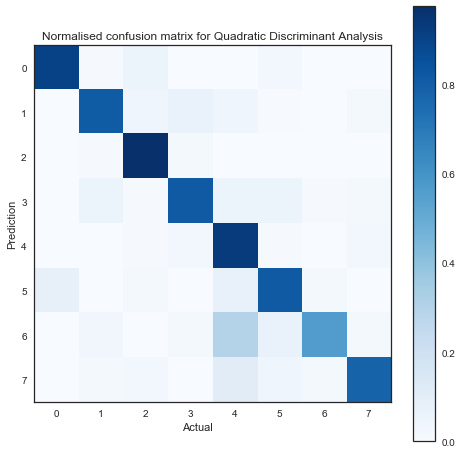

In [125]:
# Prepare the data
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class

# use PCA as dimension reduction technique and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
X_reduced= pca.fit_transform(sklearn.preprocessing.scale(x))

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_reduced, y, train_size=0.6)

fig = plt.figure(figsize=(8,8))

clf = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train)
prob = clf.predict_proba(X_test) 
pred = clf.predict(X_test)
    

cm_df = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test,pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm = sklearn.metrics.confusion_matrix(y_test, pred)

print("Confusion matrix for Quadratic Discriminant Analysis \n")
print("---------------------------------------------------------------------------\n")
print(cm_df)
    
print("\n")
print("Classification report for Quadratic Discriminant Analysis \n")
print(sklearn.metrics.classification_report(y_test, pred,digits=3))
print("---------------------------------------------------------------------------\n")

score = sklearn.metrics.f1_score(y_test, pred,average ='weighted')
f1_score =np.append(f1_score,score)

score = sklearn.metrics.precision_score(y_test, pred,average ='weighted')  
precision_score = np.append(precision_score,score)

score = sklearn.metrics.accuracy_score(y_test, pred)  
accuracy_score = np.append(accuracy_score,score)   

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

    
ax = fig.add_subplot(1,1,1)
im= ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax=plt.gca()
ax.grid(linestyle='')
fig.colorbar(im)
ax.set_title('Normalised confusion matrix for Quadratic Discriminant Analysis')

ax.set_xlabel('Actual',rotation='horizontal', ha='right')
ax.set_ylabel('Prediction')

plt.show()

### Decision Tree and Random Forest Classifier

In [126]:
# Prepare the data
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class

# use PCA as dimension reduction technique and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
X_reduced= pca.fit_transform(sklearn.preprocessing.scale(x))

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_reduced, y, train_size=0.6)

clf1 = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
clf1.fit(X_train,y_train)

pred = clf1.predict(X_test)

score = clf1.score(X_test,y_test)
print("Score for Decision Tree Classifier: {}".format(score))

score = sklearn.metrics.f1_score(y_test, pred,average ='weighted')
f1_score =np.append(f1_score,score)
print("f1 Score for Decision Tree Classifier: {}".format(score))

score = sklearn.metrics.precision_score(y_test, pred,average ='weighted')  
precision_score = np.append(precision_score,score)
print("precision Score for Decision Tree Classifier: {}".format(score))

score = sklearn.metrics.accuracy_score(y_test, pred)  
accuracy_score = np.append(accuracy_score,score)   
print("accuracy Score for Decision Tree Classifier: {}".format(score))

print("\n")
cm_df = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test,pred).T, index=clf1.classes_,columns=[0,1,2,3,4,5,6,7])
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print("Confusion matrix for Decision Tree \n")
print("---------------------------------------------------------------------------\n")
print(cm_df)

print("--------------------------------------------------------------------------------")

clf2 = RandomForestClassifier(max_depth=None,min_samples_split=2, random_state=0)
clf2.fit(X_train,y_train)

pred = clf2.predict(X_test)

score = clf2.score(X_test,y_test)
print("Score for Random Forest Classifier: {}".format(score))

score = sklearn.metrics.f1_score(y_test, pred,average ='weighted')
f1_score =np.append(f1_score,score)
print("f1 score for Random Forest Classifier: {}".format(score))

score = sklearn.metrics.precision_score(y_test, pred,average ='weighted')  
precision_score = np.append(precision_score,score)
print("precision score for Random Forest Classifier: {}".format(score))

score = sklearn.metrics.accuracy_score(y_test, pred)  
accuracy_score = np.append(accuracy_score,score)   
print("accuracy score for Random Forest Classifier: {}".format(score))

print("\n")
cm_df = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test,pred).T, index=clf2.classes_,columns=[0,1,2,3,4,5,6,7])
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print("Confusion matrix for Random Forest \n")
print("---------------------------------------------------------------------------\n")
print(cm_df)

Score for Decision Tree Classifier: 0.859375
f1 Score for Decision Tree Classifier: 0.8583715142480699
precision Score for Decision Tree Classifier: 0.8622373184265886
accuracy Score for Decision Tree Classifier: 0.859375


Confusion matrix for Decision Tree 

---------------------------------------------------------------------------

True         0   1   2    3   4    5    6    7
Predicted                                     
0.0        108   4   2    6   2    1    0    0
1.0          2  95   2    2   0    0    0    3
2.0          4   1  95    2   0    0    0    1
3.0          2  14   6  103   3    3    1    0
4.0          3   4   4    3  91    6    6    0
5.0          2   0   0    4  13  107    1    0
6.0          0   1   1    1   7    0  113    0
7.0          0  13   0    0   3    0    2  113
--------------------------------------------------------------------------------
Score for Random Forest Classifier: 0.7958333333333333
f1 score for Random Forest Classifier: 0.795213103300245

### SVC

In [127]:
# Prepare the data
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class

# use PCA as dimension reduction technique and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
X_reduced= pca.fit_transform(sklearn.preprocessing.scale(x))

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_reduced, y, train_size=0.6)

param_grid = [
  {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

clf = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(),param_grid, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.18504596,  0.17139728,  0.16785688,  0.17136755,  0.17040923,
         1.35653157,  1.35203636,  0.93982725,  1.36178446,  0.35759394,
         0.77834599,  0.28023899,  0.28967299,  0.28108177,  0.19547832]),
 'mean_score_time': array([ 0.02821693,  0.02405417,  0.01995151,  0.02159858,  0.02307446,
         0.08600104,  0.0858882 ,  0.08505201,  0.09187   ,  0.04862185,
         0.07821565,  0.03174267,  0.04230468,  0.03313549,  0.02541111]),
 'mean_test_score': array([ 0.99236111,  0.99305556,  0.99375   ,  0.99375   ,  0.99375   ,
         0.13263889,  0.13263889,  0.90625   ,  0.23611111,  0.99236111,
         0.91944444,  0.99722222,  0.98611111,  1.        ,  0.99583333]),
 'mean_train_score': array([ 0.99490685,  0.99737641,  1.        ,  1.        ,  1.        ,
         0.13263918,  0.13263918,  0.9156616 ,  0.23595772,  0.9922832 ,
         0.92546353,  0.99830282,  0.98850214,  1.        ,  0.99652752]),
 'param_C': masked_array(data = [0.01 0.1

In [128]:
clf.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [129]:
x = All_Curve_Data.drop('Curve_class', axis=1)
y = All_Curve_Data.Curve_class
pca = sklearn.decomposition.PCA()
X_reduced= pca.fit_transform(sklearn.preprocessing.scale(x))
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_reduced, y, train_size=0.6)

clf = sklearn.svm.SVC(C=100,kernel='rbf',gamma=0.001)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

score = clf.score(X_test,y_test)
print("Score for SVC Classifier: {}".format(score))

score = sklearn.metrics.f1_score(y_test, pred,average ='weighted')
f1_score =np.append(f1_score,score)
print("f1 score for SVC Classifier: {}".format(score))

score = sklearn.metrics.precision_score(y_test, pred,average ='weighted')  
precision_score = np.append(precision_score,score)
print("precision score for SVC Classifier: {}".format(score))

score = sklearn.metrics.accuracy_score(y_test, pred)  
accuracy_score = np.append(accuracy_score,score)   
print("accuracy score for SVC Classifier: {}".format(score))

print("\n")

cm_df = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test,pred).T, index=clf.classes_,columns=[0,1,2,3,4,5,6,7])
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print("Confusion matrix for SVC \n")
print("---------------------------------------------------------------------------\n")
print(cm_df)

Score for SVC Classifier: 0.9989583333333333
f1 score for SVC Classifier: 0.9989579420302229
precision score for SVC Classifier: 0.9989661654135339
accuracy score for SVC Classifier: 0.9989583333333333


Confusion matrix for SVC 

---------------------------------------------------------------------------

True         0    1    2    3    4    5    6    7
Predicted                                        
0.0        112    0    0    0    0    0    0    0
1.0          0  132    0    0    1    0    0    0
2.0          0    0  119    0    0    0    0    0
3.0          0    0    0  117    0    0    0    0
4.0          0    0    0    0  110    0    0    0
5.0          0    0    0    0    0  112    0    0
6.0          0    0    0    0    0    0  123    0
7.0          0    0    0    0    0    0    0  134


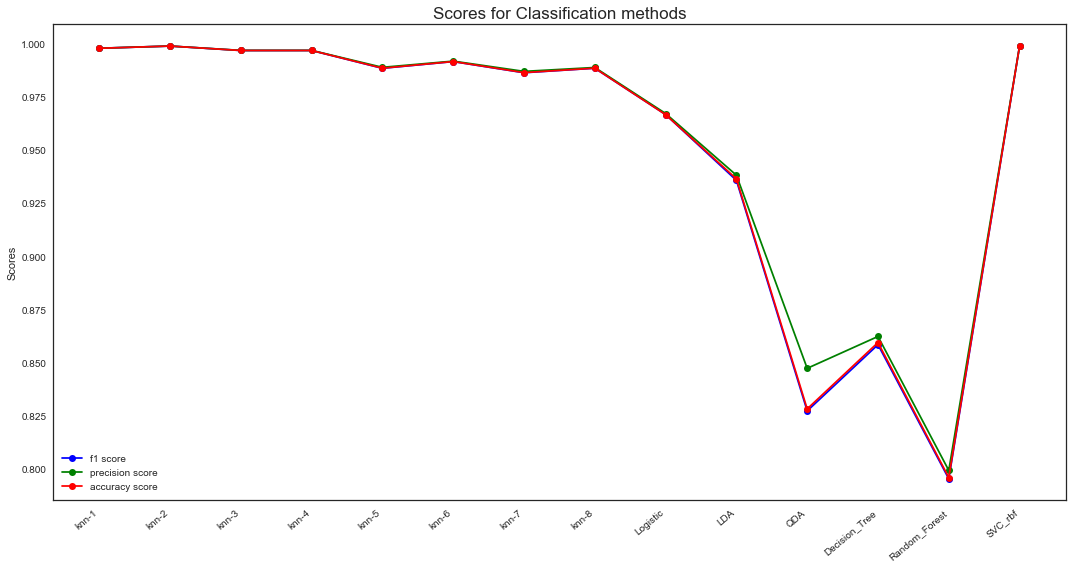

In [130]:
# Plot the scores of different clustering methods

classification_types = ['knn-1','knn-2','knn-3','knn-4','knn-5','knn-6','knn-7','knn-8',
                        'Logistic','LDA','QDA','Decision_Tree','Random_Forest','SVC_rbf']

plt.figure(figsize=(15, 8))
x = np.arange(1,15,1)

plt.plot(x,f1_score,'-bo',label='f1 score')
plt.plot(x,precision_score,'-go',label='precision score')
plt.plot(x,accuracy_score,'-ro',label='accuracy score')

plt.legend(loc='lower left')


plt.xticks(x, classification_types,rotation='40',horizontalalignment='right')

plt.ylabel("Scores")
plt.title("Scores for Classification methods", size=17)
plt.tight_layout()

The classification method performance evaluation can be analysed by considering the scores and observing the confusion matrix . Closer the score to 1, better the classification performance. 

For LVQ algorithm, we find the learned curve is not smilar to the input data and hence, this classification algorithm is not suitable for the LIDAR data 

For K-neighbour classification, it can be observed that the classification scores for every knn neighbor from 1 to 8 is similar and is around 0.98 and from the confusion matrix of Knn classsification method, it can be observed that there are very less incorrect predicted observations.

For Logistic regression, LDA and QDA the scores observed are less compared to Knn method scores. Also, it can be observed from the confusion matrix that there few incorrect number of predictions but the scores are lesser than the scores for Knn classification method

For Decision tree classifier the scores as well as the confusion matrix looks good. But for random forest classification, the scores are the lowest as compared to other classification methods and also there more number of incorrect predictions.

For SVC , first we find the best parameter c, and kernel using gridsearch CV. It is observed that SVC with rbf kernel and C =100 is the best combination for classifying LIDAR data. Thus, from confusion matrix it can be observed that, there are no incorrect predictions as well as the scores are highest that is 0.99.

Thus, it can be observed that there is not much difference between  decision tree and Knn neighbor classification methods but clearly, from the scores and confusion amtrix, it can be observed that SVC is the best classsification method.This method can be considered for clustering for data with noise

It can be observed that SVC with 'rbf' kernel is best classification method for data without noise

## Task 4
##### Points 10

Test your clustering and classification method with a variety of methods for preprocessing, dimension reduction, and scoring.

Select the best performing method for detailed presentation. Briefly describe other methods and justify your choice.

#### Preprocessing: 
Preprocessing techniques are used to standardize the data. Preprocessing techniques distribute the data normally around zero. If the preprocessing techniques are not used, sometimes the machine learning packages may behave badly and provide incorrect results.

The standardization of data is necessary as many machine learning packages assume that the data to is centered around zero and have variance in same order. 

The preprocessing technique used for classification and clustering method is scale which scales the data to zero mean with unit variance. This method is easy and quick to preprocess the data. This method is used in task 2 and task 3 for clustering and classification mehtods

#### Dimension reduction: 
Dimension reduction is uded to reduce the number of random variables by obtaining set the principal components from the availabe data. It is useful as it improves the performance of model as well as the data is easy to visualize when it is reduced to 2D or 3D. Two dimension reduction techniques are used: Principal component analysis and spectral embedding. For classification method PCA is the best method as we can see the scores and number of correct predictions are good. For hierarchial agglomerative clustering, spectral embedding is best suited as the clusters are properly separated and and the scores are better as compared to PCA 


#### Scores:
For clustering methods, four scores are calculated: adjusted_rand_score,adjusted_mutual_info_score, homogeneity_score and completeness_score. All the value are very close to each other. For classification method 3 types of scores are calculated: f1 score, accuracy score and precision score and these score values are also similar to each other.

These all techniques are used in task 2 and task 3 for getting better performance of clustering and classification methods

## Task 5
##### Points 10

Explore the tolerance of your best clustering and classification methods to noise in LIDAR data. Plot graphs that show the performance as a function of the noise. You can use the `bias` parameter of `ciNeuroBotSimulator.run()` to change the levels of noise.

In [1]:
# %load sim_main.py
from simulator.code.ciNeuroBotSimulator import *
filenames = ['xs_noise','rt_noise','lt_noise','tsection_front_noise','tsection_right_noise','tsection_left_noise','hallway_noise','noexit_noise']


bias1 = [(10,20,30),(20,30,50),(70,100,80)]
i=0
# TODO: add more cues

cfgs = ['simulator/config/maze_xs_config.json','simulator/config/maze_rt_config.json',
        'simulator/config/maze_lt_config.json','simulator/config/maze_tsection_front_config.json',
        'simulator/config/maze_tsection_right_config.json','simulator/config/maze_tsection_left_config.json',
        'simulator/config/maze_hallway_config.json','simulator/config/maze_noexit_config.json']

# runs all 
for iter in range(len(cfgs)):
    file_name = 'simulator/data/'+filenames[i]+'.dat'
    for k in range (0,3):
        sim = ciNeuroBotSimulator(cfgs[iter], None)
        sim.adjustWalls(5, (40, 40))  # translation of the geometry of a physical maze to simulated GUI
        sim.run(visualize=True,
        number_of_points=100,
        #file='simulator/data/lt.dat',
        file = file_name,
        randomize='uniform',
        randomizeDir='uniform',
        bias=bias1[k])  # horizontal, vertical, angular
    i=i+1

    print('Finished', iter)

Finished 0
Finished 1
Finished 2
Finished 3
Finished 4
Finished 5
Finished 6
Finished 7


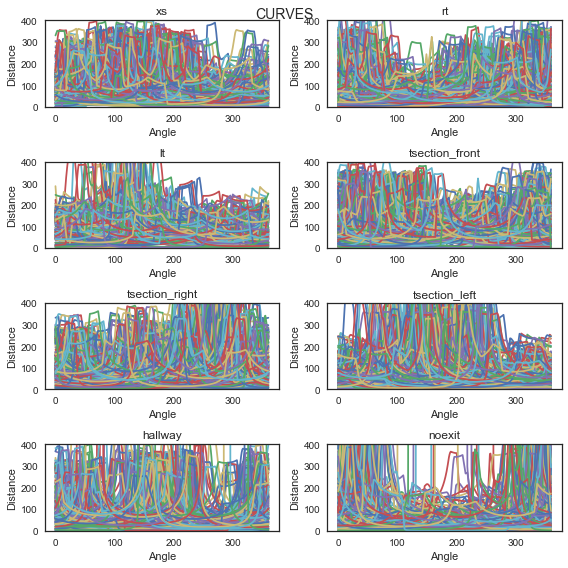

In [131]:
# list of key values
key_value =['xs','rt','lt','tsection_front','tsection_right','tsection_left','hallway','noexit']

def get_labels(file):
    labels = []
    for i, line in enumerate(file):
        labels.append(line.strip().split(','))
    return labels

def get_curves(dir):
    labels = get_labels(open(os.path.join(dir, "labels1.txt")))
    all_curves = dict()
    # Create dictionary with 8 key values
    all_curves = {'xs': [], 'rt': [],'lt':[],'tsection_front':[],'tsection_right':[],'tsection_left':[],'hallway':[],'noexit':[]}
    

    for i in range (0,8):
        curves = np.genfromtxt(os.path.join(dir, str(labels[0][i]) + ".dat"))
        np.place(curves, curves==0, [curves.max()]) # eliminate zeros (NaN in LIDAR jargon)
        curves = curves.astype(int)
        if curves.ndim < 2:
            curves = np.reshape(curves, [1, len(curves)])
        # smoothing the curve to avoid plenty of local minima in actual LIDAR readings 
        # add the processed values to the keys
        all_curves[key_value[i]].append(scipy.signal.savgol_filter(curves, 5, 1))
    return all_curves, labels

all_curves, labels = get_curves('simulator/data')

# Create a dataframe to store the values of curves
columns = np.append(np.arange(0, 360, 1), ['Curve_class'])
All_Curve_Data_noise = pd.DataFrame(columns=columns)

# Plot the curves
fig = plt.figure(figsize=(8,8))
fig.suptitle("CURVES", fontsize=14)
n = 1

for i in range (0,8):
    curves = all_curves[key_value[i]]    
    ax = fig.add_subplot(4,2,n)
    ax.set_title(key_value[i])
    ax.set_ylabel("Distance")
    ax.set_xlabel("Angle")
    ax.set_ylim(0, 400)

    # Plot all 300 x 360 values of each cue and also save the values in dataframe with the cue type
    for k in range(0,300):
        ax.plot(np.arange(0, 360, 1), curves[0][k])
        All_Curve_Data_noise = All_Curve_Data_noise.append(pd.DataFrame([np.append(curves[0][k], [i])], columns=columns))
        
    n=n+1
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.99, wspace=0.4, hspace=0.4)
fig.tight_layout()
plt.show()

In [132]:
# Arrays for storing scores
noise_adjusted_rand = np.array([])
noise_adjusted_mutual_info = np.array([])
noise_homogeneity = np.array([])
noise_completeness = np.array([])
noise_f1score = np.array([])
noise_accuracy_score = np.array([])
noise_precision_score = np.array([])

### Hierarchial Clustering using Scipy

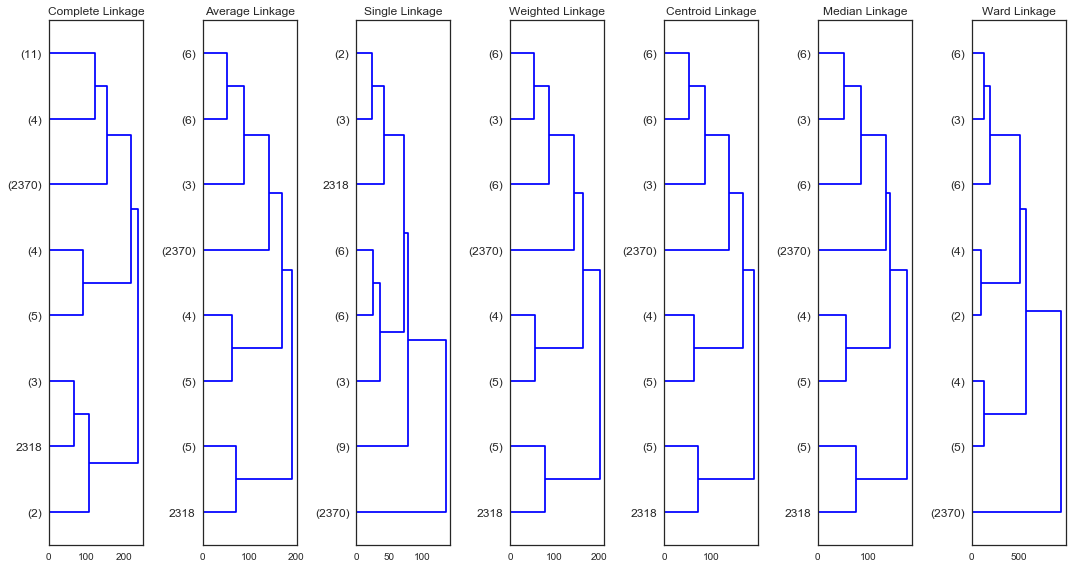

In [133]:
# Prepare the data
x = All_Curve_Data_noise.drop('Curve_class', axis=1)
y = All_Curve_Data_noise.Curve_class

# Declare an array to store labels
label_str = np.array([])

# Use PCA as dimension reduction method and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
df_plot= pca.fit_transform(sklearn.preprocessing.scale(x))
no_of_PCA = 3

# Find clusters for different types of linkages
linkage_names =['complete','average','single','weighted','centroid','median','ward']


plt.figure(figsize=(10,20))

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7, figsize=(15,8))
y_true_labels = ['(300)', '(300)', '(300)', '(300)', '(300)', '(300)', '(300)', '(300)']
for linkage, cluster, ax in zip([scipy.cluster.hierarchy.complete(df_plot[:,:no_of_PCA]), 
                                 scipy.cluster.hierarchy.average(df_plot[:,:no_of_PCA]), 
                                 scipy.cluster.hierarchy.single(df_plot[:,:no_of_PCA]),
                                 scipy.cluster.hierarchy.weighted(df_plot[:,:no_of_PCA]), 
                                 scipy.cluster.hierarchy.centroid(df_plot[:,:no_of_PCA]), 
                                 scipy.cluster.hierarchy.median(df_plot[:,:no_of_PCA]), 
                                 scipy.cluster.hierarchy.ward(df_plot[:,:no_of_PCA])],
                                ['c1','c2','c3','c4','c5','c6','c7'],
                                [ax1,ax2,ax3,ax4,ax5,ax6,ax7]):
    cluster = scipy.cluster.hierarchy.dendrogram(linkage,truncate_mode='lastp', p=8, ax=ax,orientation='right',color_threshold=0,show_leaf_counts=True)
    # Store the labels for all 7 types of linkages
    label_str = np.append(label_str,cluster['ivl'])
    

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage')
ax4.set_title('Weighted Linkage')
ax5.set_title('Centroid Linkage')
ax6.set_title('Median Linkage')
ax7.set_title('Ward Linkage')

fig.tight_layout()



In [134]:
# Calculate the accuracy of Clustering methods for PCA = 3 components

# Get true labels
y_true =  All_Curve_Data_noise.Curve_class.ravel()

clustering_types = ['complete','average','single','weighted','centroid','median','ward']

# Decare an array to store value of predicted labels
label_pred =np.array([])

# Convert the labels from string to int
for i in range(0,56):
    labels_stripped = label_str[i].strip('()')
    label_pred = np.append(label_pred,labels_stripped)
label_pred = label_pred.astype(int)

print("Scores for hierarchial clustering with PCA components =3\n")
index =0

# Calculate the scores for allt he linkage types
for i in range (0,7):
    y_pred =np.array([])
    y_pred_count = label_pred[index:index+8]
    for j in range (0,8):
        count = y_pred_count[j]
        for m in range (0,count):
            y_pred = np.append(y_pred,j)
    shape = int(y_pred.shape[0])
    
    # Sometimes clustering returns labels with a size larger than the size of the original data
    # andhence, scores cannot be calculated for larger data
    if(shape<= 2400):

        # Calculate the score for clustering
        score1 = sklearn.metrics.adjusted_rand_score(y_true,y_pred)
        
        score2 = metrics.adjusted_mutual_info_score(y_true,y_pred)
        
        score3 = metrics.homogeneity_score(y_true,y_pred)
        
        score4 = metrics.completeness_score(y_true,y_pred) 
        
    else:
        score1=0
        score2=0
        score3=0
        score4=0
        
    noise_adjusted_rand = np.append(noise_adjusted_rand,score1)
    print("{} Linkage : Adjusted Rand score : {}".format(clustering_types[i],score1))
    noise_adjusted_mutual_info = np.append(noise_adjusted_mutual_info,score2)
    print("{} Linkage : Adjusted Mutual Info score : {}".format(clustering_types[i],score2))
    noise_homogeneity = np.append(noise_homogeneity,score3)
    print("{} Linkage : Homogeneity score : {}".format(clustering_types[i],score3))
    noise_completeness = np.append(noise_completeness,score3)   
    print("{} Linkage :Completeness score : {}\n".format(clustering_types[i],score4))
    print("------------------------------------------------------------------------\n")
        
    index = index+8
    

Scores for hierarchial clustering with PCA components =3

complete Linkage : Adjusted Rand score : 0
complete Linkage : Adjusted Mutual Info score : 0
complete Linkage : Homogeneity score : 0
complete Linkage :Completeness score : 0

------------------------------------------------------------------------

average Linkage : Adjusted Rand score : 0
average Linkage : Adjusted Mutual Info score : 0
average Linkage : Homogeneity score : 0
average Linkage :Completeness score : 0

------------------------------------------------------------------------

single Linkage : Adjusted Rand score : 0
single Linkage : Adjusted Mutual Info score : 0
single Linkage : Homogeneity score : 0
single Linkage :Completeness score : 0

------------------------------------------------------------------------

weighted Linkage : Adjusted Rand score : 0
weighted Linkage : Adjusted Mutual Info score : 0
weighted Linkage : Homogeneity score : 0
weighted Linkage :Completeness score : 0

----------------------------

### Hiearchial clustering using Scikit

ward Linkage : Adjusted Rand score : 0.0003485361528313076
ward Linkage : Adjusted Mutual Info score : 0.007595303110287301
ward Linkage : Homogeneity score : 0.01277338562127127
ward Linkage :Completeness score : 0.292436852784581

------------------------------------------------------------------------

average Linkage : Adjusted Rand score : 0.0003485361528313076
average Linkage : Adjusted Mutual Info score : 0.007595303110287301
average Linkage : Homogeneity score : 0.01277338562127127
ward Linkage :Completeness score : 0.292436852784581

------------------------------------------------------------------------

complete Linkage : Adjusted Rand score : 0.0003485361528313076
complete Linkage : Adjusted Mutual Info score : 0.007595303110287301
complete Linkage : Homogeneity score : 0.01277338562127127
ward Linkage :Completeness score : 0.292436852784581

------------------------------------------------------------------------



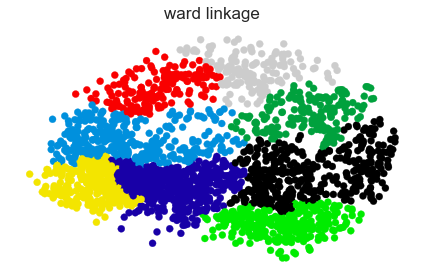

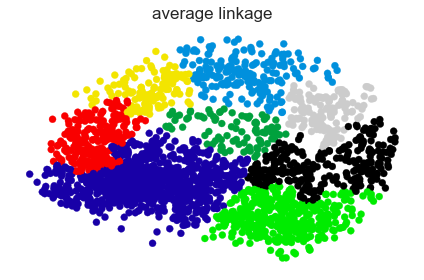

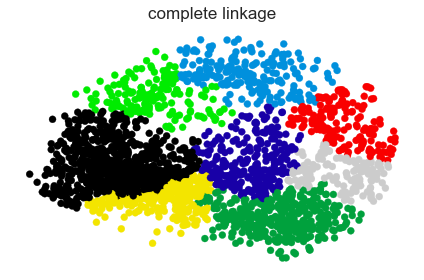

In [135]:
# Prepare the data
x = All_Curve_Data_noise.drop('Curve_class', axis=1)
y = All_Curve_Data_noise.Curve_class

# use SpectralEmbedding as dimension reduction technique and scale as preprocessing technique
X_reduced= sklearn.manifold.SpectralEmbedding(n_components=2).fit_transform(sklearn.preprocessing.scale(x))

# Clustering on different types of linkages
for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=8)
    clustering.fit(X_reduced)
    
    # Calculate the score for clustering
    score1 = sklearn.metrics.adjusted_rand_score(y,y_pred)
    noise_adjusted_rand = np.append(noise_adjusted_rand,score1)
    score2 = metrics.adjusted_mutual_info_score(y,y_pred)
    noise_adjusted_mutual_info = np.append(noise_adjusted_mutual_info,score2)
    score3 = metrics.homogeneity_score(y,y_pred)
    noise_homogeneity = np.append(noise_homogeneity,score3)
    score4 = metrics.completeness_score(y,y_pred) 
    noise_completeness = np.append(noise_completeness,score3)
    
    
    print("{} Linkage : Adjusted Rand score : {}".format(linkage,score1))
    
    print("{} Linkage : Adjusted Mutual Info score : {}".format(linkage,score2))
   
    print("{} Linkage : Homogeneity score : {}".format(linkage,score3))
    
    print("{} Linkage :Completeness score : {}\n".format(clustering_types[i],score4))
    print("------------------------------------------------------------------------\n")
    
    plot_clustering(X_reduced, x, clustering.labels_, "{} linkage".format(linkage))
    
plt.tight_layout()
plt.show()

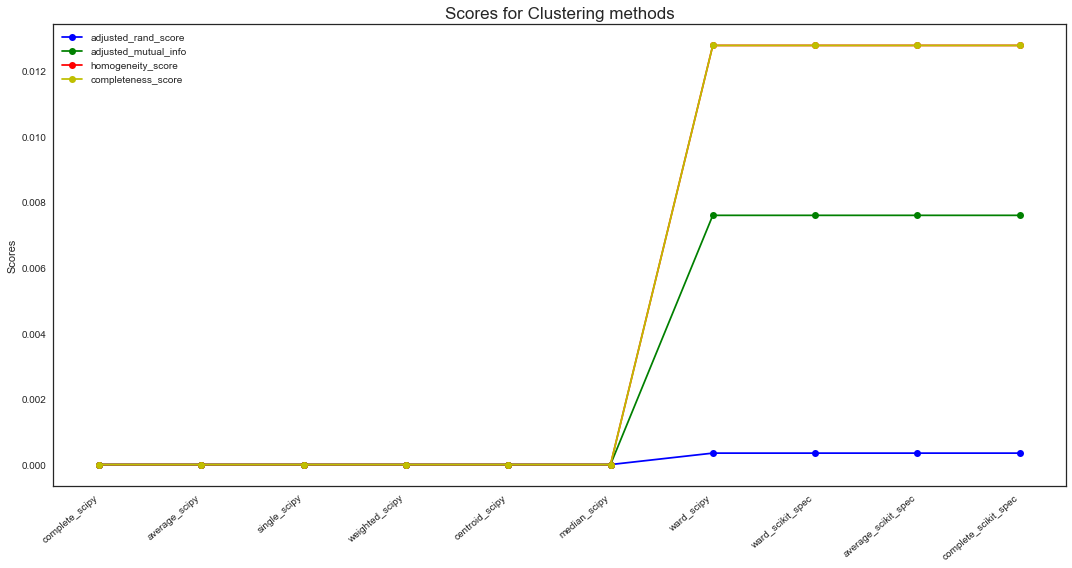

In [136]:
# Plot the scores of different clustering methods

clustering_methods = ['complete_scipy','average_scipy','single_scipy',
                      'weighted_scipy','centroid_scipy','median_scipy','ward_scipy','ward_scikit_spec', 
                      'average_scikit_spec', 'complete_scikit_spec']

plt.figure(figsize=(15, 8))
x = np.arange(1,11,1)

plt.plot(x,noise_adjusted_rand,'-bo',label='adjusted_rand_score')
plt.plot(x,noise_adjusted_mutual_info,'-go',label='adjusted_mutual_info')
plt.plot(x,noise_homogeneity,'-ro',label='homogeneity_score')
plt.plot(x,noise_completeness,'-yo',label='completeness_score')
plt.legend(loc='upper left')


plt.xticks(x, clustering_methods,rotation='40',horizontalalignment='right')

plt.ylabel("Scores")
plt.title("Scores for Clustering methods", size=17)
plt.tight_layout()

### Classification

### KNN neighbors

Confusion matrix for Knn 1 neighbor 

---------------------------------------------------------------------------

True       0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0
Predicted                                        
0.0         91    2    1    5    3    4    6    2
1.0          1  104    6    8    1    3    1    2
2.0          5    8  116    2    3    4    3    0
3.0          3    5    3   89    5    1    1    4
4.0          3    0    0    4   94    2    5    0
5.0          8    2    3    4    3  113    3    0
6.0          0    0    0    1    4    2   95    1
7.0          2    5    0    0    0    0    5  109


Classification report for Knn 1 neighbor 

             precision    recall  f1-score   support

        0.0      0.798     0.805     0.802       113
        1.0      0.825     0.825     0.825       126
        2.0      0.823     0.899     0.859       129
        3.0      0.802     0.788     0.795       113
        4.0      0.870     0.832     0.851       113
        5.0      0.83

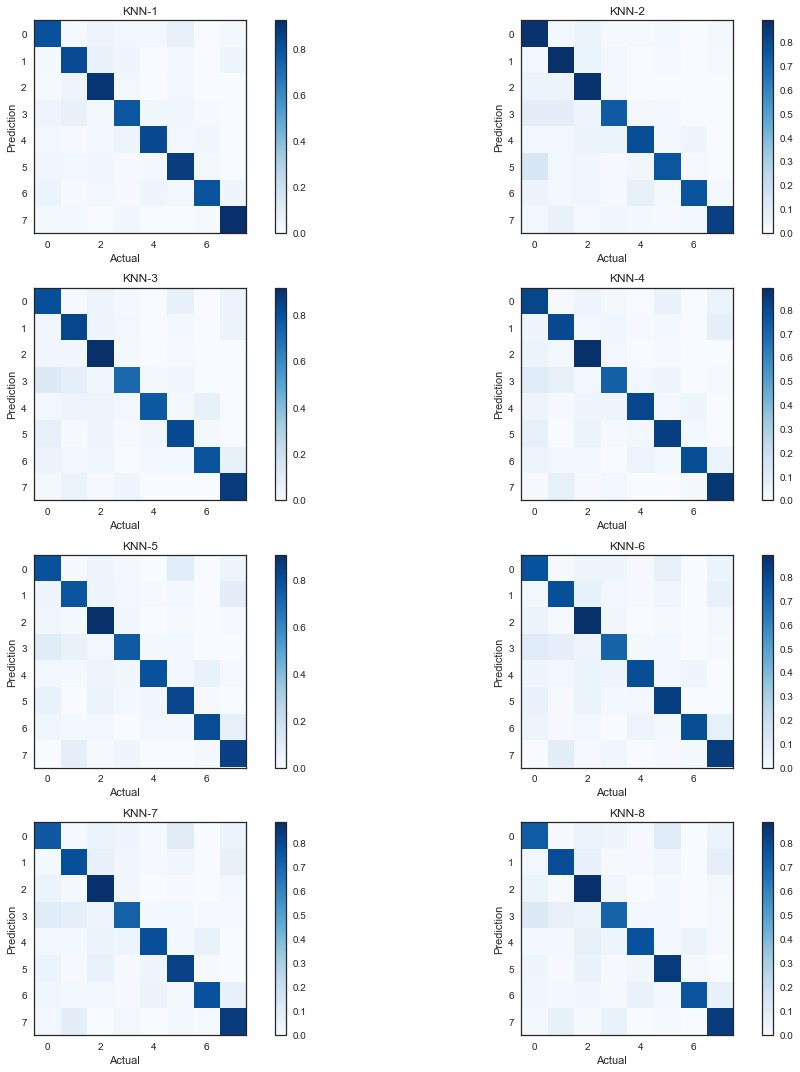

In [137]:
# Prepare the data
x = All_Curve_Data_noise.drop('Curve_class', axis=1)
y = All_Curve_Data_noise.Curve_class

# use PCA as dimension reduction technique and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
X_reduced= pca.fit_transform(sklearn.preprocessing.scale(x))

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_reduced, y, train_size=0.6) 

n=1
fig = plt.figure(figsize=(15,15))

for j in range (1,9):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=j)
    knn.fit(X_train,y_train)
    pred = knn.fit(X_train, y_train).predict(X_test)
    cm_df = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test,pred).T, index=knn.classes_,columns=knn.classes_)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    cm = sklearn.metrics.confusion_matrix(y_test, pred)

    print("Confusion matrix for Knn {} neighbor \n".format(j))
    print("---------------------------------------------------------------------------\n")
    print(cm_df)
    
    print("\n")
    print("Classification report for Knn {} neighbor \n".format(j))
    print(sklearn.metrics.classification_report(y_test, pred, digits=3))
    print("---------------------------------------------------------------------------\n")
    
    score = sklearn.metrics.f1_score(y_test, pred,average ='weighted')
    noise_f1score = np.append(noise_f1score,score)
    
    score = sklearn.metrics.precision_score(y_test, pred,average ='weighted')  
    noise_precision_score = np.append(noise_precision_score,score)
                                            
    score = sklearn.metrics.accuracy_score(y_test, pred)  
    noise_accuracy_score = np.append(noise_accuracy_score,score)                                       
                                            
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

    
    ax = fig.add_subplot(4,2,n)
    im= ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    ax=plt.gca()
    ax.grid(linestyle='')
    fig.colorbar(im)
    ax.set_title('KNN-{}'.format(j))

    ax.set_xlabel('Actual',rotation='horizontal', ha='right')
    ax.set_ylabel('Prediction')
    n=n+1

plt.subplots_adjust(left=None, bottom=None, right=None, top=0.99, wspace=0.4, hspace=0.4)
fig.tight_layout()
plt.show()

### Decision Tree 

In [138]:
# Prepare the data
x = All_Curve_Data_noise.drop('Curve_class', axis=1)
y = All_Curve_Data_noise.Curve_class

# use PCA as dimension reduction technique and scale as preprocessing technique
pca = sklearn.decomposition.PCA()
X_reduced= pca.fit_transform(sklearn.preprocessing.scale(x))

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_reduced, y, train_size=0.6)

clf1 = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
clf1.fit(X_train,y_train)

pred = clf1.predict(X_test)


cm_df = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test,pred).T, index=clf1.classes_,columns=[0,1,2,3,4,5,6,7])
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print("Confusion matrix for Decision Tree \n")
print("---------------------------------------------------------------------------\n")
print(cm_df)

print("\n")
score = clf1.score(X_test,y_test)
print("Score for Decision Tree Classifier: {}".format(score))

score = sklearn.metrics.f1_score(y_test, pred,average ='weighted')
noise_f1score  =np.append(noise_f1score ,score)
print("f1 Score for Decision Tree Classifier: {}".format(score))

score = sklearn.metrics.precision_score(y_test, pred,average ='weighted')  
noise_precision_score = np.append(noise_precision_score,score)
print("precision Score for Decision Tree Classifier: {}".format(score))

score = sklearn.metrics.accuracy_score(y_test, pred)  
noise_accuracy_score = np.append(noise_accuracy_score,score)   
print("accuracy Score for Decision Tree Classifier: {}".format(score))


Confusion matrix for Decision Tree 

---------------------------------------------------------------------------

True        0   1   2   3   4   5   6   7
Predicted                                
0.0        63   5  11   9   4  12   1   6
1.0         3  74   4  10   6   0   4  10
2.0        12   6  65  13   3   5   3   6
3.0         7  11  11  59   6   6   4   6
4.0        13  11   4  10  79   9  11   2
5.0        23   5  11  12   9  69   9   7
6.0         0   5   7   8  11   8  75   3
7.0         5   3   3   5   4   0   3  91


Score for Decision Tree Classifier: 0.5989583333333334
f1 Score for Decision Tree Classifier: 0.5997899749944277
precision Score for Decision Tree Classifier: 0.6063657149762575
accuracy Score for Decision Tree Classifier: 0.5989583333333334


### SVC

In [139]:
x = All_Curve_Data_noise.drop('Curve_class', axis=1)
y = All_Curve_Data_noise.Curve_class
pca = sklearn.decomposition.PCA()
X_reduced= pca.fit_transform(sklearn.preprocessing.scale(x))
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_reduced, y, train_size=0.6)

clf = sklearn.svm.SVC(C=100,kernel='rbf',gamma=0.001)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)


score = clf1.score(X_test,y_test)
print("Score for SVC: {}".format(score))

score = sklearn.metrics.f1_score(y_test, pred,average ='weighted')
noise_f1score  =np.append(noise_f1score ,score)
print("f1 Score for SVC: {}".format(score))

score = sklearn.metrics.precision_score(y_test, pred,average ='weighted')  
noise_precision_score = np.append(noise_precision_score,score)
print("precision Score for SVC: {}".format(score))

score = sklearn.metrics.accuracy_score(y_test, pred)  
noise_accuracy_score = np.append(noise_accuracy_score,score)   
print("accuracy Score for SVC: {}".format(score))

print("\n")
cm_df = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test,pred).T, index=clf.classes_,columns=[0,1,2,3,4,5,6,7])
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print("Confusion matrix for SVC \n")
print("---------------------------------------------------------------------------\n")
print(cm_df)

Score for SVC: 0.8333333333333334
f1 Score for SVC: 0.5841877771063427
precision Score for SVC: 0.6050013479897186
accuracy Score for SVC: 0.590625


Confusion matrix for SVC 

---------------------------------------------------------------------------

True        0   1   2   3   4   5   6    7
Predicted                                 
0.0        80   2  17   6   7  19   8    4
1.0         2  71   7  32  18   4   6    4
2.0         8   7  53  11   9   6  16    3
3.0         3   7   4  49   3   1   0    0
4.0         2  11   2   4  61   2   3    1
5.0        13   5   6   5   6  73   0    5
6.0         2   0  31   9  23   0  69    0
7.0         5  12   5   5   8   4  10  111


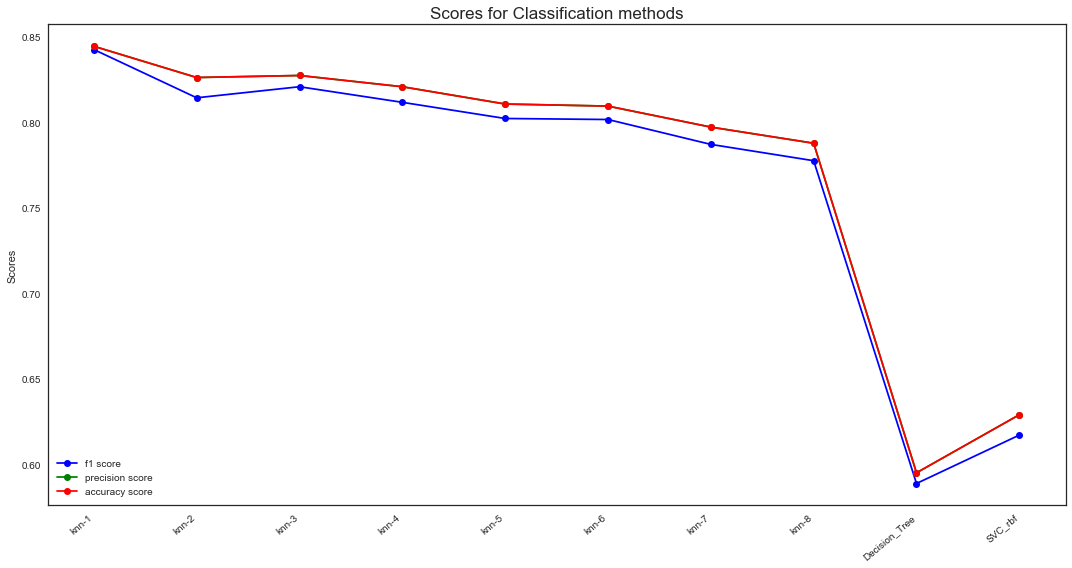

In [55]:
# Plot the scores of different clustering methods

classification_types = ['knn-1','knn-2','knn-3','knn-4','knn-5','knn-6','knn-7','knn-8',
                        'Decision_Tree','SVC_rbf']

plt.figure(figsize=(15, 8))
x = np.arange(1,11,1)

plt.plot(x,noise_f1score,'-bo',label='f1 score')
plt.plot(x,noise_precision_score,'-go',label='precision score')
plt.plot(x,noise_precision_score,'-ro',label='accuracy score')

plt.legend(loc='lower left')


plt.xticks(x, classification_types,rotation='40',horizontalalignment='right')

plt.ylabel("Scores")
plt.title("Scores for Classification methods", size=17)
plt.tight_layout()

For the data with noise, the best classification method is KNN-1 and best clustering method is any of the ward linkage using scipy, ward,complete and average linkage using scikit (agglomerative clustering) as the scores are similar


## Task 6
##### Points 10

Provide a comprehensive narration and visualization to document your findings.

The quality of your notebook should be at a level of a conference paper.

LIDAR data is used by the Neuroserver to traverse the maze. The data for every possible cue is recorded and different classification and clustering methods are applied to find out which best method is suited for the LIDAR data. These methods will able the neuroserver to interpret what cure it has encountered while travelling through the maze. 

#### Preprocessing and Dimension reduction techniques:

Before applying any classification or clustering techniques, it is necessary to standardize the data to zero mean and uniform variance. Also it helps to enhance the performance of the clustering and classsification methods if the random variables are reduced and principle components are obtained. Thus, preprocessing techniques like "scale" and dimension reduction techniques like "PCA" are best suited for the LIDAR data.

#### Clustering:

Clustering means grouping objects in such a way that the objects in same group are more similar to each other than to the objects in other groups. This is unsupervised learning where you do not consider classes for grouping the objects in the same group. Here for clustering, 2 categories of clustering are used:
    
1. K-means clustering: 
   - K-means clustering with 2 clusters
   - K-means clustering with 3 clusters
   - K-means clustering with 4 clusters 
   - K-means clustering with 8 clusters
   
    
2. Hierarchial Clustering:

    - Using Scipy: complete,average,single,weighted,centroid,median and ward linkages
    - Aglomerative Clustering Using Scikit : ward, average and complete

A good K- means clustering and agglomerative clustering method is the one in which the clusters don't overlap and a good hierarchial clustering is the one which returns the labels closed to the the value counts of the types of classes.
    
The clustering performance evaluation can be done by finding out adjusted Rand score,adjusted_mutual_info, homogeneity_score and completeness_score that finds the similarity of clustering assignments. The score score close to zero means that the objects belonging to same class are split across different clusters and score closer to 1 means that the objects belonging to same class are places in same cluster. Thus, higher the score of clustering better the performance of the clustering method
    
Thus from the graph "Scores for Clustering methods" above we can see that the scores of hierarchial clustering - using scipy and aglomerative clustering are better than the scores of K-means. Also from the plots we can see that in K-means clustering the cluster are somewhat overlapping. The plot for aglomerative clustering using Spectral Embedding dimension reduction technique shows that the clusters are well separated and grouped. The hierarchial clustering using scipy - ward, complete, average, weighted and centroid have better label counts that are closer to 300 count of each class and better scores.
    
For data without noise, the best clustering method is anyone of the ward linkage using scipy, ward,complete and average aglomerative clustering using scikit as the scores are similar. Also, even if noise is introduced in data, these clustering methods perform the best compared to other methods

#### Classification:

Classification means identifying to which set of group a new data belongs. This is supervised learning where you consider training set of data whose class or the group to which a data belongs is known. For classification we are using following methods:

1. K nearest neighbors - 1 to 8

2. Logistic regression

3. Linear Discriminant analysis

4. Quadratic discriminant analysis

5. Decision Tree classification

6. Random forest classification

7. SVC 

A good classification method is the one which has the scores closer to 1 and that has the number of correct classified objects in confusion matrix. For evaluating classification methods, here f1 score, precision score and accuracy scores that evaluates the number of correctly classified objects. The scores closer to 1 means that the new object is correctly predictes as an object from a particular class based on the known training data. 

Also sometimes, the scores can be misleading as it provides the overall accuracy of prediction and does not provide the accuracy of prediction of each clas in multiclass data. Thus to correctly evaluate the classification method, it is also necessary to analyse the confusion matrix as it gives the number of correctly classified and the number of wrongly classsified objects in the data. The diagonal of the confusion matrix defines the number of correctly classified objects and the other elements define the erroneously classified objects
    
Thus from the graph "Scores of Classification methods" above, we can find that SVC method has the best score around 0.99 to 1 and the scores of KNN method and decision tree clssifier method are very close to each other around 0.98. ANd also there no incorrectly predicted objects in confusion matrix of SVC method and there are very few incorrectly predicted objects for KNN and deciison tree classifier methods.
    
For the data without noise, it is observed that SVC classifier is the best classification method with highest score and correct number of predictions. However, the same is not true, if noise is introduced in the data. It is observed that the performance of SVC classifier reduces from 0.99 to 0.6 when noise is introduced. The best classification method for the data when noise is introduced is KNN-1 method with score of 0.84. The score of KNN-1 method without noise in data is observed to be 0.99. 
    
Thus, when data is noisy, the performance of KNN-1 method detoriates by 15.15% when data is noisy while the performance of SVC classifier deteoriates by 33% when noise is introduced. 
    
From above findings it can be stated that KNN-1 classification method is well suited for classification for data with noise or without noise
